<a href="https://colab.research.google.com/github/leoazeved0/mvp_puc_rio/blob/main/MVP_Sprint_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MVP SPRINT I - Análise de Dados e Boas Práticas**

##**1 - Introdução**

O dataset escolhido foi o "Adult", um problema de aprendizado supervisionado de classificação quanto a igualdade de renda. Este problema consiste em prever se a renda anual de uma pessoa nos EUA cai na categoria de renda superior a 50 mil dólares ou menos de 50 mil dólares com base em um determinado conjunto de atributos.

Ronny Kohavi e Barry Becker extraíram o conjunto de dados do banco de dados do censo de 1994. O conjunto de dados contém informações sobre 32.561 registros individuais e 15 atributos.

A lista completa das variáveis ​​é a seguinte:

Age, Workclass, Final Weight, Education, Education Number of Years, Marital-status, Occupation, Relationship, Race, Sex, Capital-gain, Capital-loss,Hours-per-week, Native-country e Income.

* **age**: A idade de um indivíduo.

Continuous.
* **workclass**: Um termo geral para representar a situação profissional de um indivíduo.

Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* **fnlwgt**: Peso final. Em outras palavras, este é o número de pessoas que o censo acredita.

Continuous.
* **education**: O mais alto nível de educação alcançado por um indivíduo.

Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* **education.num**: O mais alto nível de educação alcançado na forma numérica.

Continuous.
* **marital.status**: Estado civil de um indivíduo. “Married.civ.spouse” corresponde ao cônjuge civil enquanto “Married.AF.spouse” corresponde ao cônjuge das Forças Armadas.

Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* **occupation**: O tipo geral de ocupação de um indivíduo.

Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* **relationship**: Representa o que esse indivíduo é em relação aos outros. Por exemplo, um indivíduo pode ser um marido. Cada entrada possui apenas um atributo de relacionamento.

Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* **race**: Descrições da raça de um indivíduo.

White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* **sex**: O sexo biológico do indivíduo.

Female, Male.
* **capital.gain**: Ganhos de capital para um indivíduo.

Continuous.
* **capital.loss**: Perda de capital para um indivíduo.

Continuous.
* **hours.per.week**: As horas que um indivíduo relatou trabalhar por semana.

Continuous.
* **native.country**: País de origem para um indivíduo.

United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
* **income**: Se um indivíduo ganha ou não mais de US$ 50.000 anualmente.
Existem dois valores de classe ">50K" e "<=50K".

##**2 - Import das bibliotecas**

In [ ]:
pip install --upgrade category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.0 MB/s eta 0:00:00


In [ ]:
# Imports necessários
import pandas as pd #biblioteca para manipulação e análise de dados
import numpy as np #coleção de rotinas para processar arrays
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter #formatar rótulos como uma porcentagem
import category_encoders as ce #para codificação de variáveis ​​​​categóricas em numéricas com diferentes técnicas
import seaborn as sns #para visualização de dados estatísticos
%matplotlib inline
from collections import Counter #dict subclasse para contar objetos
from sklearn.preprocessing import LabelEncoder #codificar rótulos de destino com valor entre 0 e n_classes-1
from sklearn.metrics import confusion_matrix #matriz de confusão
from sklearn.preprocessing import MinMaxScaler #padroniza para um determinado intervalo
from sklearn.model_selection import train_test_split #para particionar em bases de treino e teste (holdout)
from sklearn.model_selection import KFold #para preparar os folds da validação cruzada
from sklearn.model_selection import StratifiedKFold #variação do KFold que retorna dobras estratificadas


##**3 - Análise Exploratória Inicial**

**3.1 - Carregamento e análises do Dataset**

In [ ]:
# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/leoazeved0/mvp_puc_rio/main/mvp1_dataset_adult.csv"

# Lê o arquivo
dataset = pd.read_csv(url)


In [ ]:
# Mostra as 5 primeiras linhas do dataset
dataset.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [ ]:
# Mostra as 5 últimas linhas do dataset
dataset.tail()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32560,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
# Mostrando a dimensionalidade do dataset
print(f"Número de linhas : {dataset.shape[0]}")
print(f"Número de colunas : {dataset.shape[1]}")

Número de linhas : 32561
Número de colunas : 15


In [ ]:
# Mostrar os types dos atributos do dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Como visto, o dataset possui 32.561 registros e 15 atributos, sendo 9 variáveis qualitativas (sendo a coluna income a classe) e 6 quantitativas.

In [ ]:
# Visualizando as colunas com valores do tipo 'object' (qualitativas)
colunascategoricas = [var for var in dataset.columns if dataset[var].dtype=='O']

print('São {} colunas \n'.format(len(colunascategoricas)))

print('As colunas são :\n\n', colunascategoricas)

São 9 colunas 

As colunas são :

 ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country', 'income']


In [ ]:
# Visualizando as colunas numéricas (quantitativas)

colunanumerica = [coluna for coluna in dataset.columns if dataset[coluna].dtype!='O']

print('São {} colunas com valores numéricos\n'.format(len(colunanumerica)))

print('As colunas com valores numéricos são:', colunanumerica)

São 6 colunas com valores numéricos

As colunas com valores numéricos são: ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']


> **3.1.1 - Análise das colunas não numéricas.**









In [ ]:
# Mostra as 5 primeiras linhas do dataset com as variáveis categóricas
dataset[colunascategoricas].head()

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
0,?,HS-grad,Widowed,?,Not-in-family,White,Female,United-States,<=50K
1,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,United-States,<=50K
2,?,Some-college,Widowed,?,Unmarried,Black,Female,United-States,<=50K
3,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,United-States,<=50K
4,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,United-States,<=50K


In [ ]:
# Mostra as 5 últimas linhas do dataset com as variáveis categóricas
dataset[colunascategoricas].tail()

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
32556,Private,Some-college,Never-married,Protective-serv,Not-in-family,White,Male,United-States,<=50K
32557,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32558,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32559,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
32560,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


In [ ]:
# Valores ausentes em cada uma das colunas não numéricas
dataset[colunascategoricas].isnull().sum()

workclass         0
education         0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
native.country    0
income            0
dtype: int64

Após verificar a existência de valores ausentes nas colunas não numéricas, percebemos que não retornaram missings.
Mas para uma análise mais detalhada, a seguir verificarei os valores existentes em cada uma das variáveis.

In [ ]:
# Verificar os valores existentes em cada coluna com as suas respectivas quantidades
for coluna in colunascategoricas:

    print(dataset[coluna].value_counts())

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital.status, dtype: int64
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         377

Acima foi verificado casos de valores preenchidos com "?", por este motivo não foram identificados como missings.

Sabendo que os casos de missings são os preenchidos com "?", vou verificar a quantidade de valores existentes em cada coluna não numérica.

In [ ]:
# Verificar a quantidade de valores "?"
dataset[colunascategoricas].isin(['?']).sum()

workclass         1836
education            0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
native.country     583
income               0
dtype: int64

Com a análise acima foi possível identificar casos de missings nas colunas workclass, occupation e native.country que serão tratados futuramente na etapa de pré-processamento dos dados.

<Axes: xlabel='income', ylabel='Frequência'>

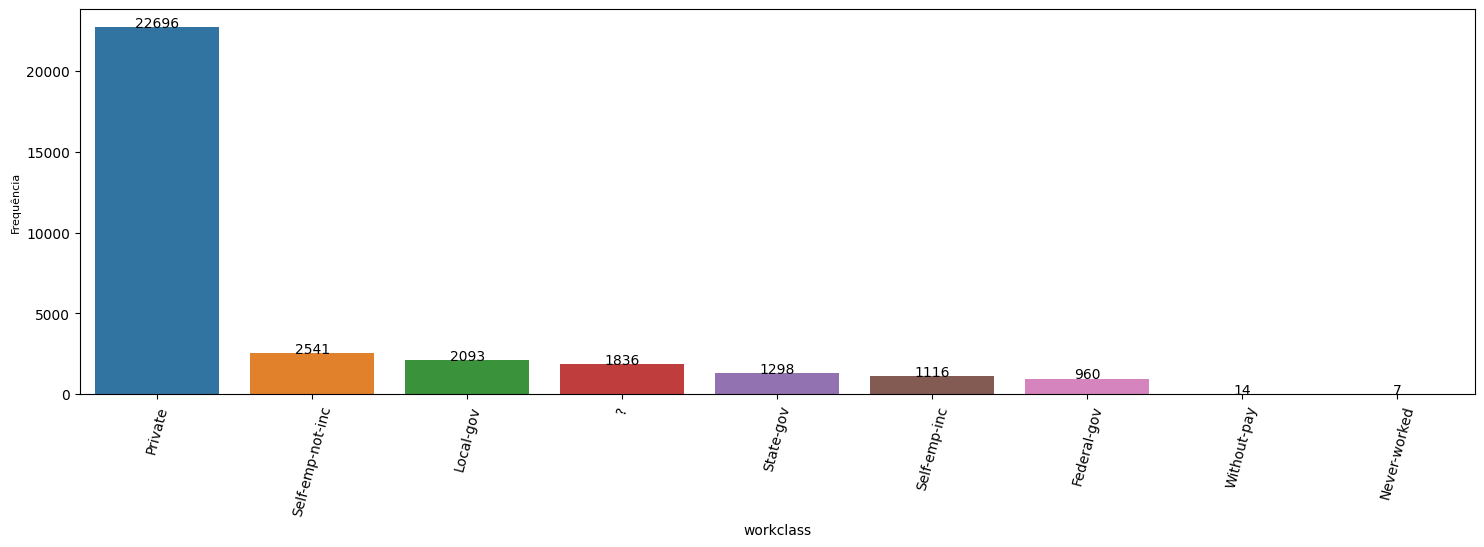

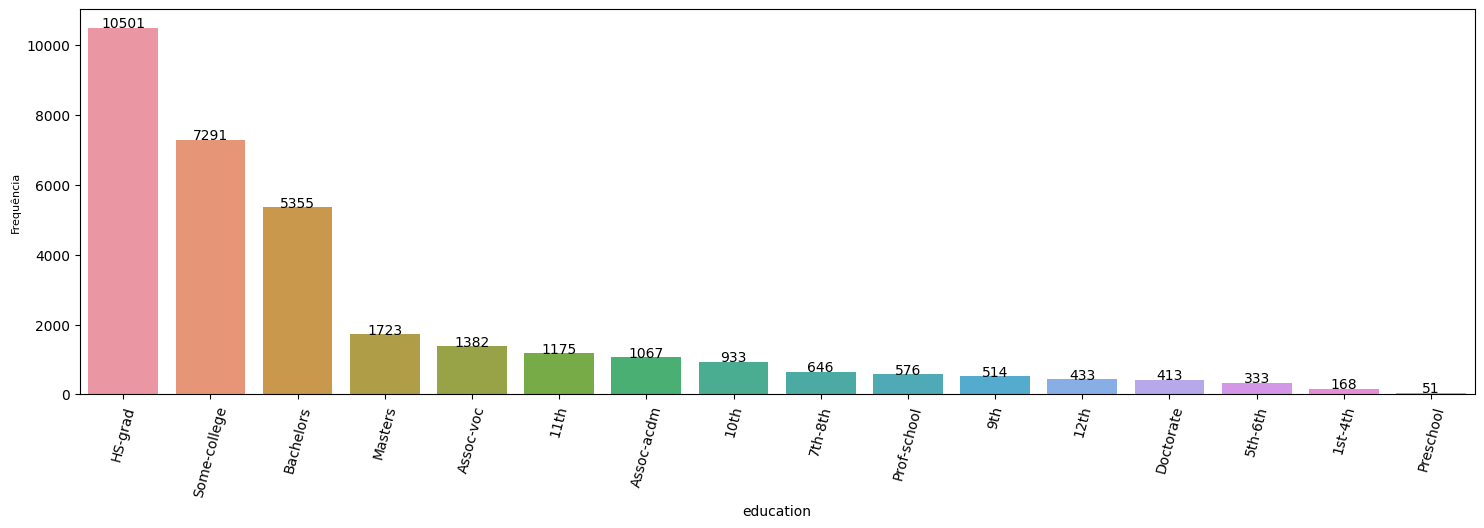

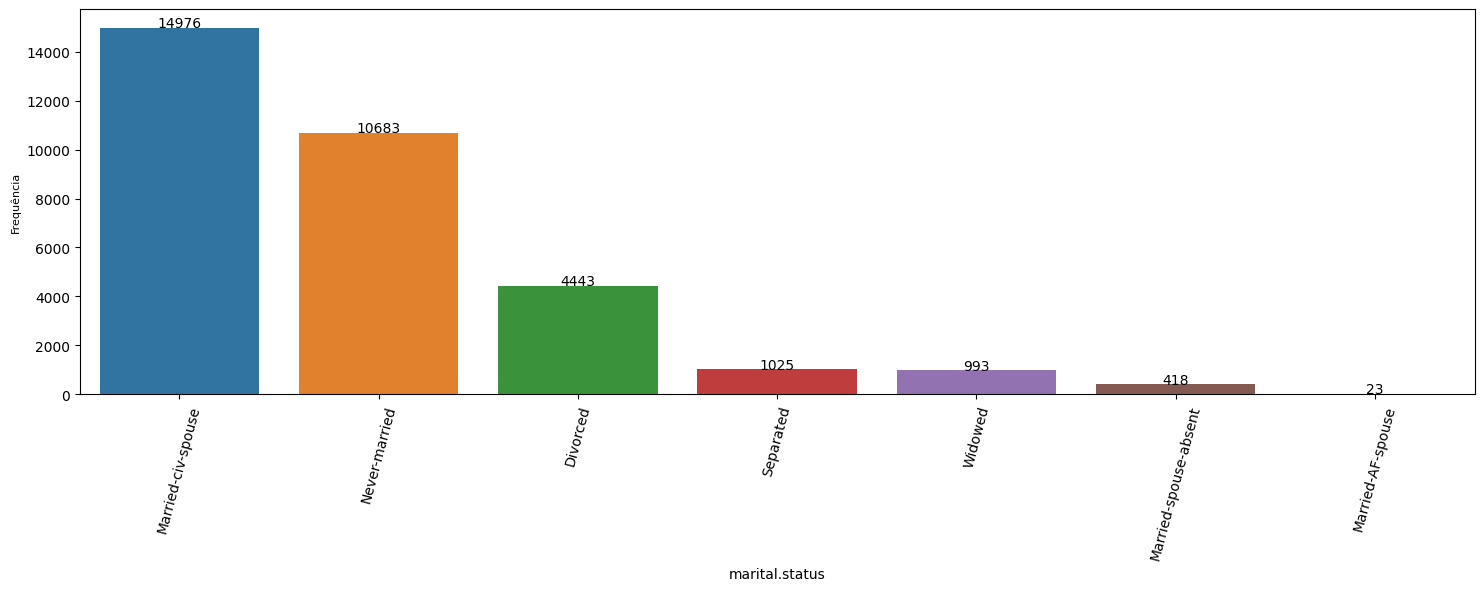

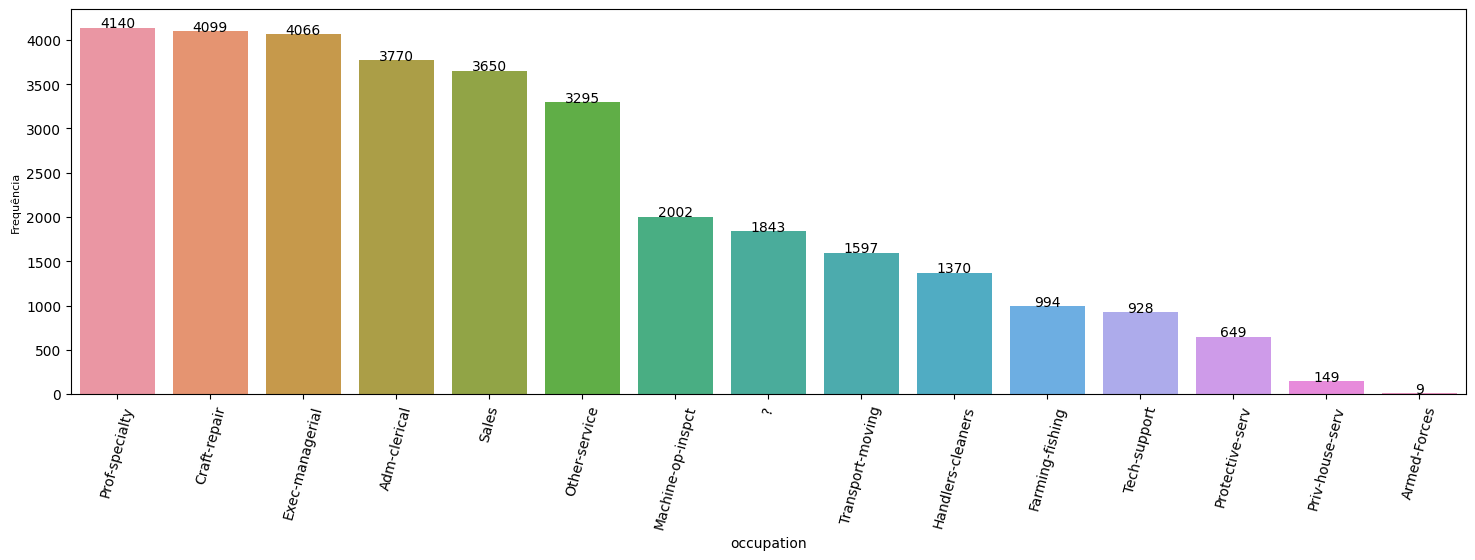

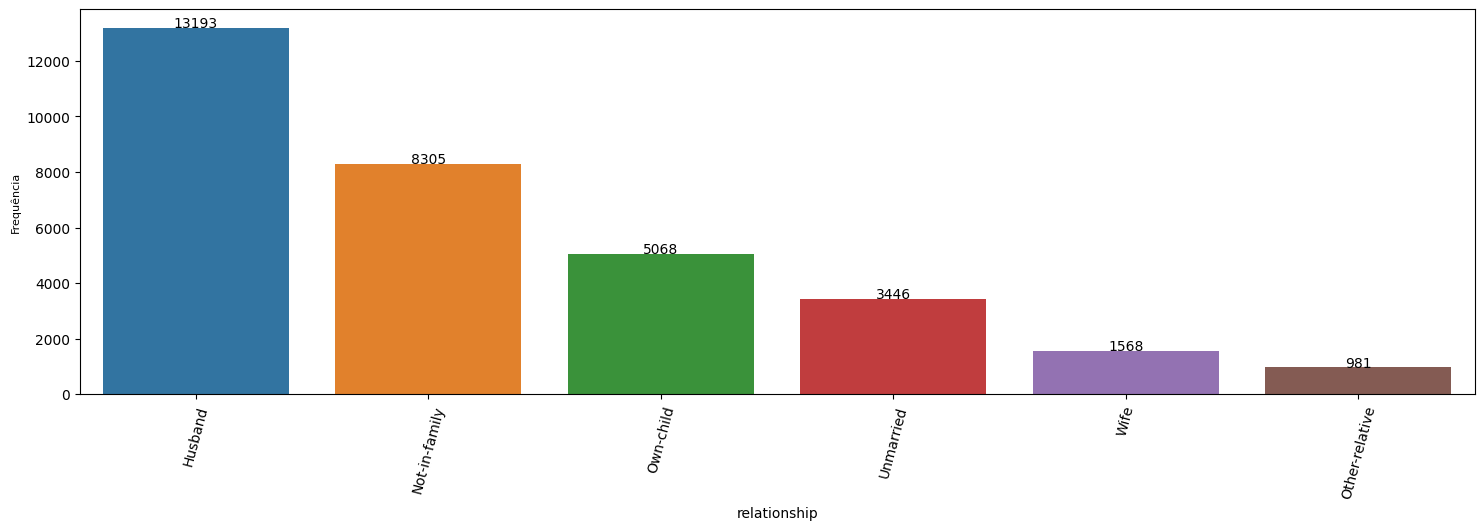

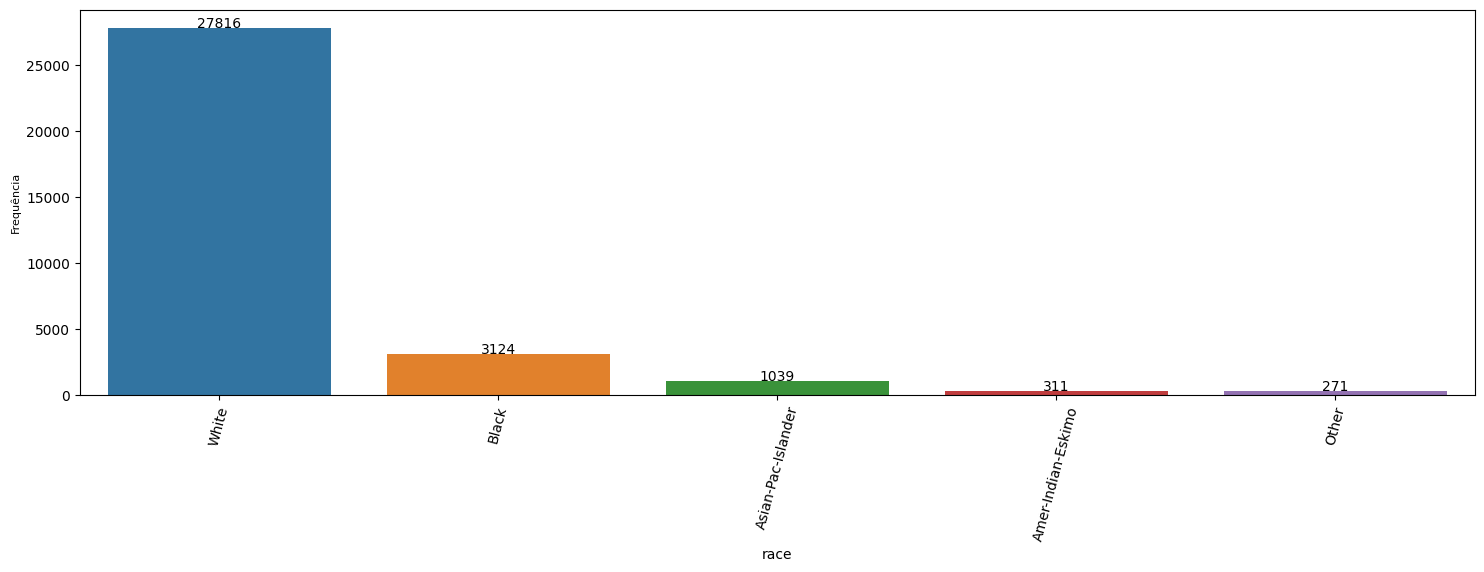

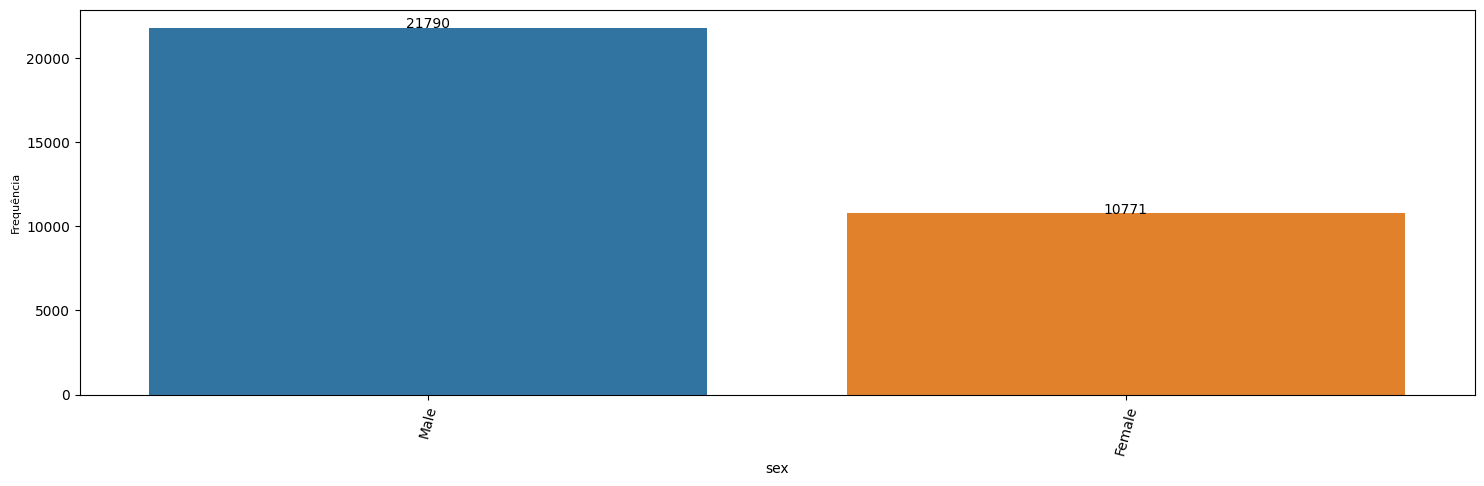

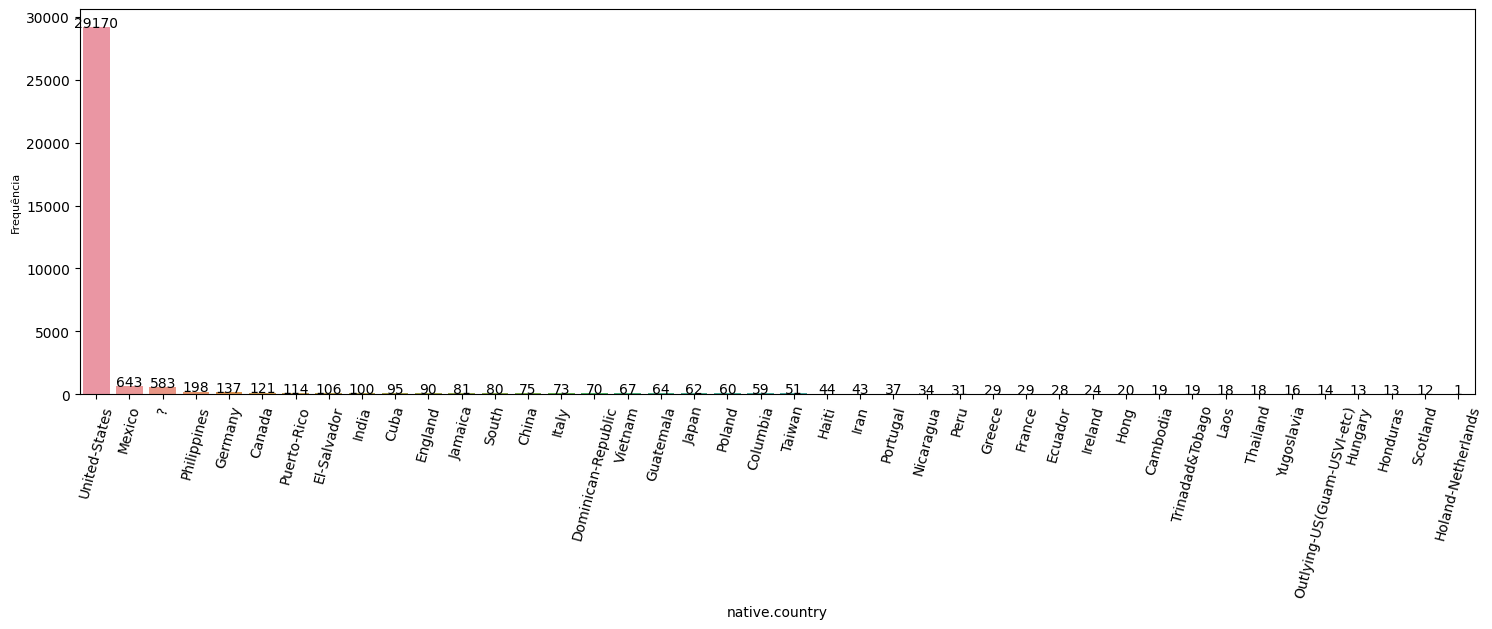

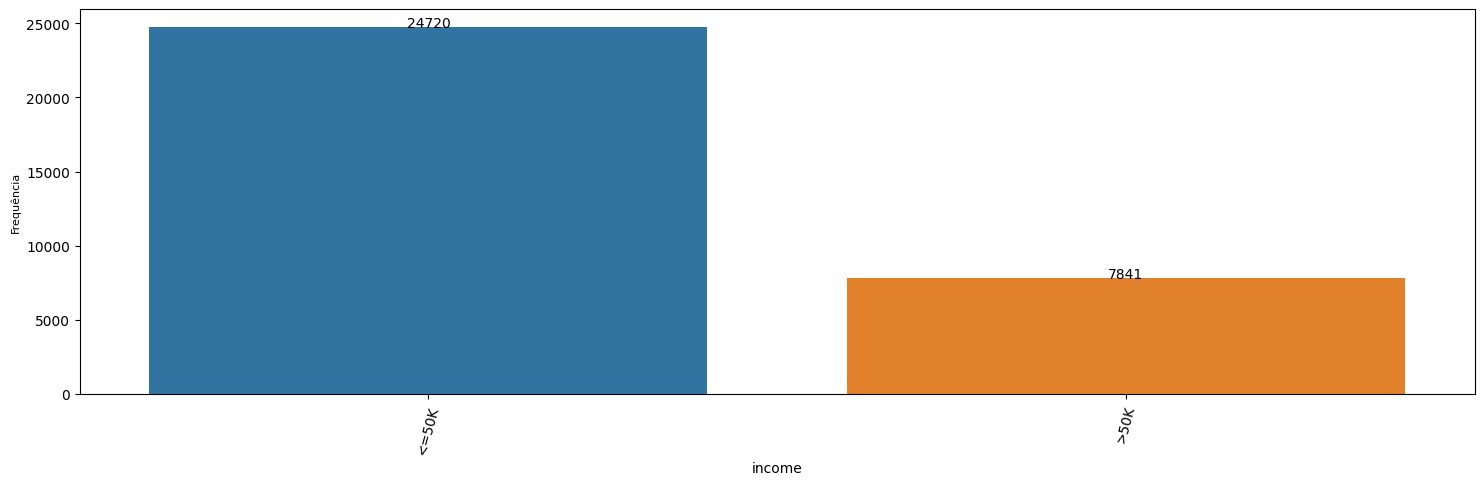

In [ ]:
# Plotando gráfico com as frequências dos valores em cada coluna não numérica
for coluna in colunascategoricas:
  plt.figure(figsize=(18, 5))
  highest_education = dataset[coluna].value_counts().index
  ax = sns.countplot(data=dataset, x=coluna, order=highest_education)
  plt.xticks(rotation=75)
  ax.set_ylabel('Frequência',fontsize=8)


  for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
    height + 3,
    '{:1.0f}'.format((height)),
    ha='center')
ax


Analisando os gráficos com os valores contidos em cada coluna, lembrando que ainda não foi tratado os valores preenchidos como '?', podemos concluir as seguintes informações:


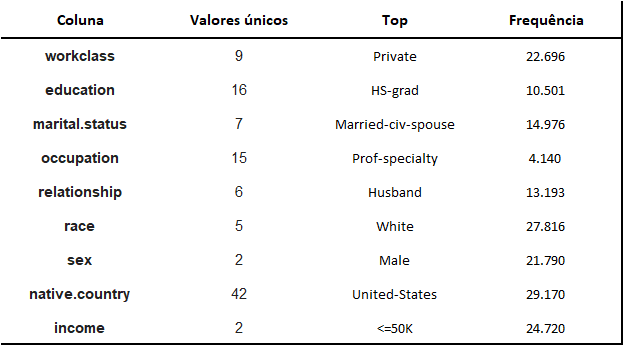


> **3.1.2 - Análise das colunas numéricas.**

In [ ]:
# Mostra as 5 primeiras linhas do dataset com as variáveis quantitativas
dataset[colunanumerica].head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
0,90,77053,9,0,4356,40
1,82,132870,9,0,4356,18
2,66,186061,10,0,4356,40
3,54,140359,4,0,3900,40
4,41,264663,10,0,3900,40


In [ ]:
# Mostra as 5 últimas linhas do dataset com as variáveis quantitativas
dataset[colunanumerica].tail()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
32556,22,310152,10,0,0,40
32557,27,257302,12,0,0,38
32558,40,154374,9,0,0,40
32559,58,151910,9,0,0,40
32560,22,201490,9,0,0,20


In [ ]:
# Valores ausentes em cada uma das colunas numéricas
dataset[colunanumerica].isnull().sum()

age               0
fnlwgt            0
education.num     0
capital.gain      0
capital.loss      0
hours.per.week    0
dtype: int64

In [ ]:
# Checando as estatísticas descritivas das colunas numéricas.
dataset.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


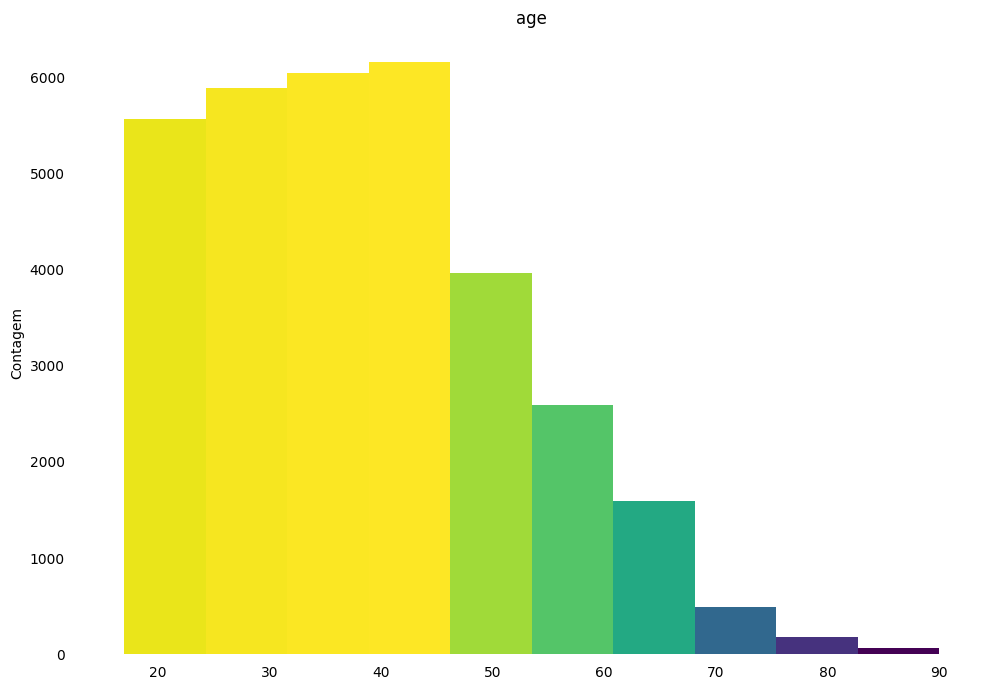

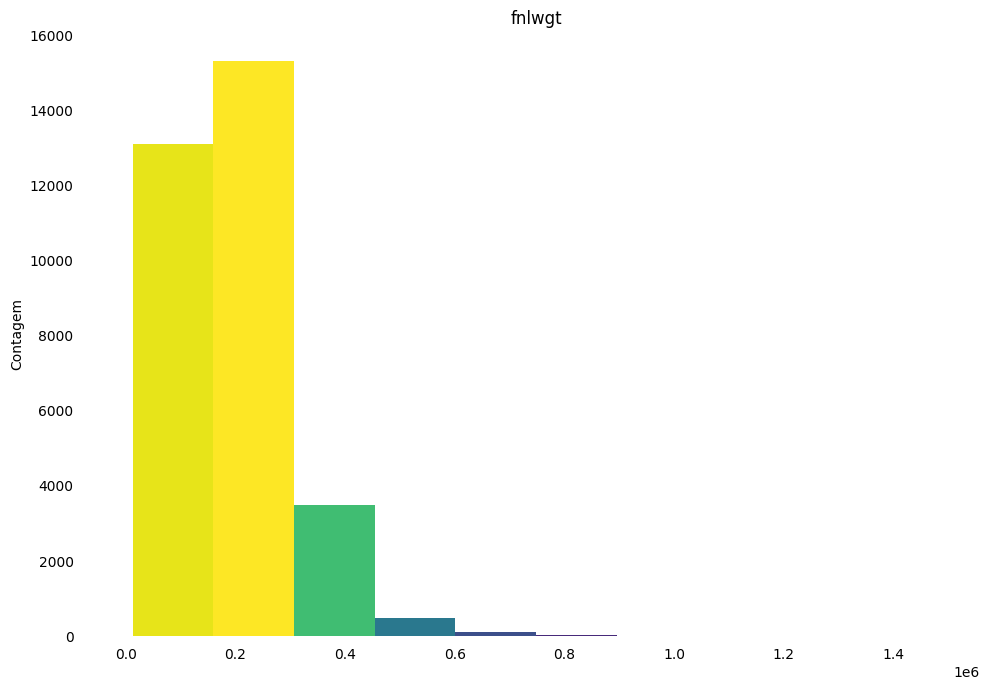

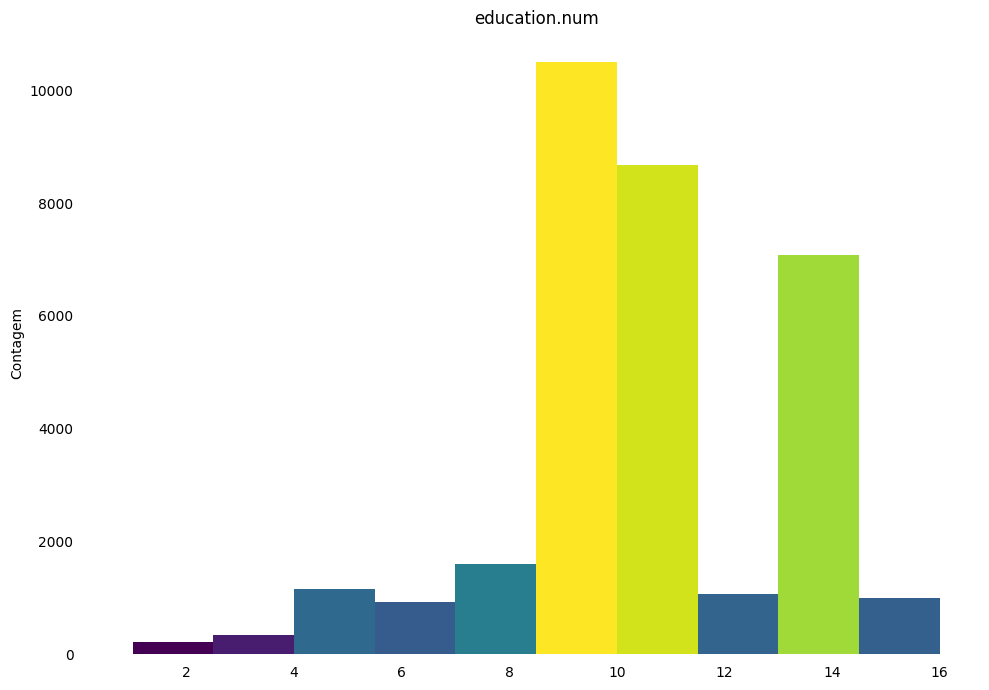

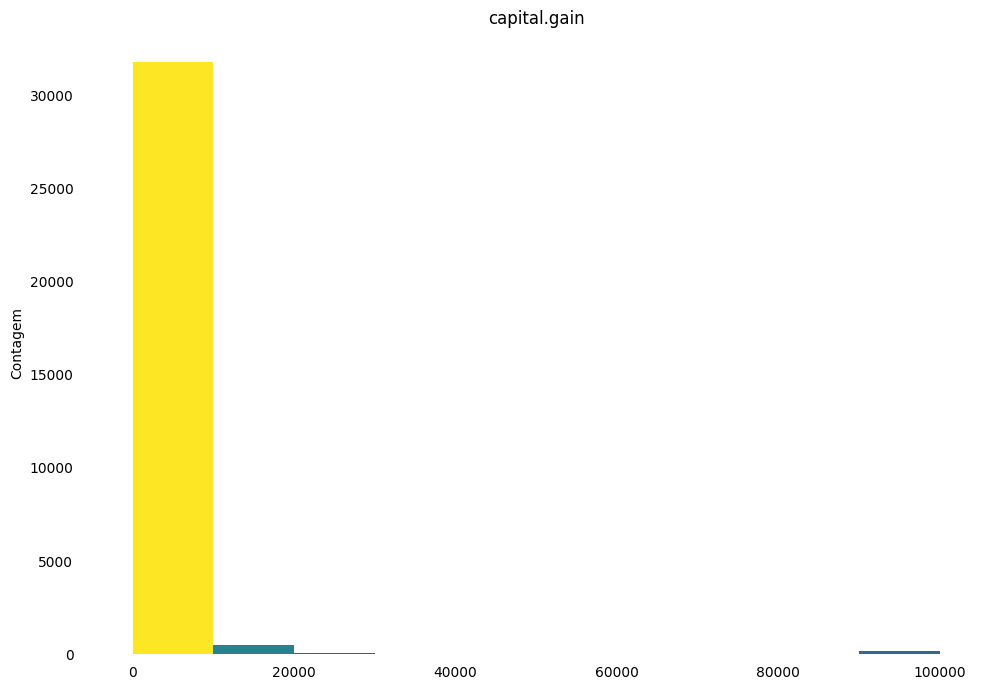

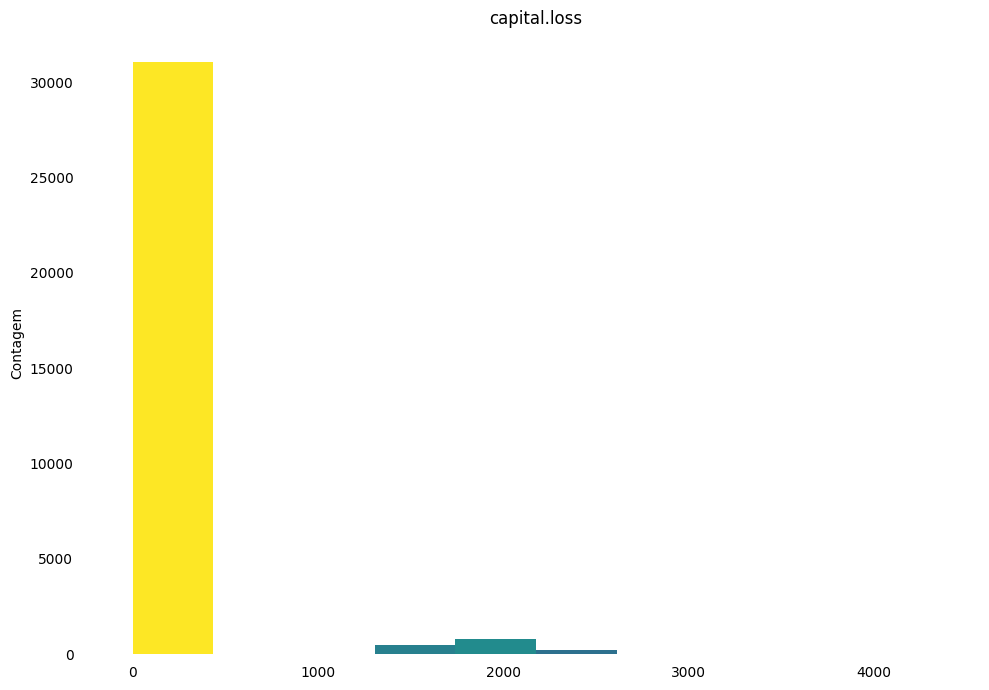

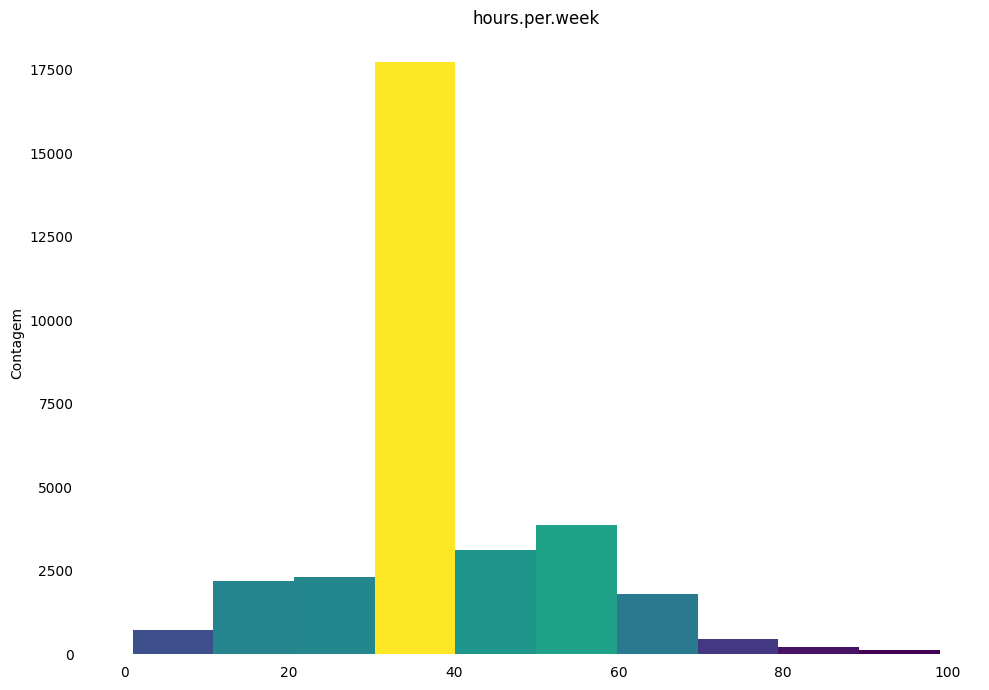

In [ ]:
for coluna in colunanumerica:
  # Criando histogramas
  fig, axs = plt.subplots(1, 1,
                          figsize =(10, 7),
                          tight_layout = True)

  # Remove axes splines
  for s in ['top', 'bottom', 'left', 'right']:
      axs.spines[s].set_visible(False)

  # Remove x, y ticks
  axs.xaxis.set_ticks_position('none')
  axs.yaxis.set_ticks_position('none')

  # Adicionando preenchimento entre eixos e rótulos
  axs.xaxis.set_tick_params(pad = 5)
  axs.yaxis.set_tick_params(pad = 10)

  # Criando histogramas
  N, bins, patches = axs.hist(dataset[coluna])

  # Definindo cor
  fracs = ((N**(1 / 5)) / N.max())
  norm = colors.Normalize(fracs.min(), fracs.max())

  for thisfrac, thispatch in zip(fracs, patches):
      color = plt.cm.viridis(norm(thisfrac))
      thispatch.set_facecolor(color)

  # Adicionando extra features
  #plt.xlabel("X-axis")
  plt.ylabel("Contagem")
  plt.title(coluna)

  # Show plot
  plt.show()

In [ ]:
# Verificar a quantidade de valores '0' nas colunas 'capital.gain', 'capital.loss'
colunascomprefixocapital = ['capital.gain', 'capital.loss']
for coluna in colunascomprefixocapital:
  print('Percentual de valores 0 na coluna '+ coluna, dataset[coluna].between(0, 0).sum() / len(dataset[coluna]) * 100)


Percentual de valores 0 na coluna capital.gain 91.67101747489328
Percentual de valores 0 na coluna capital.loss 95.33490986149073


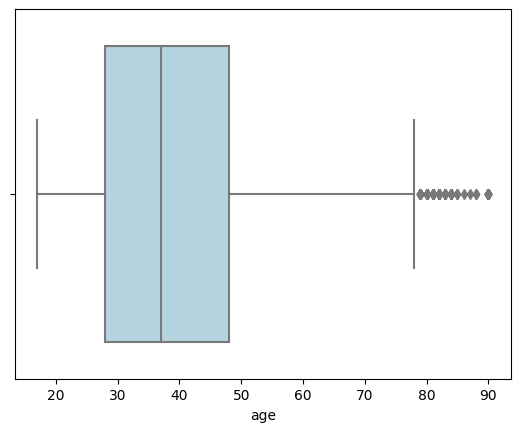

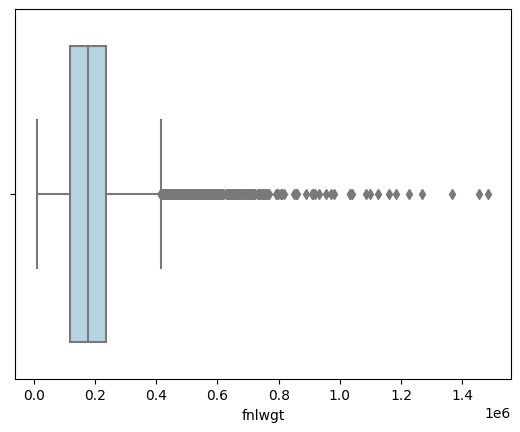

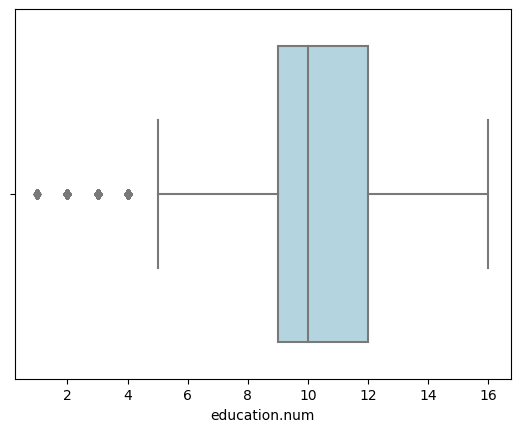

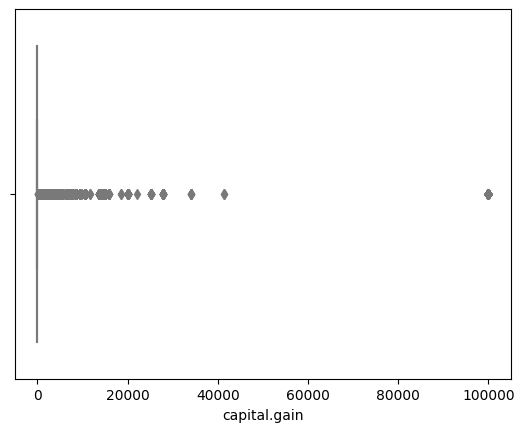

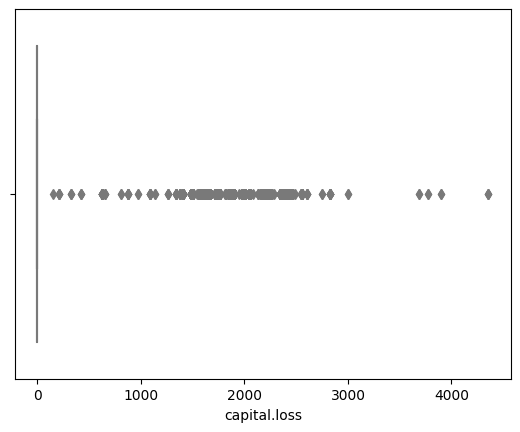

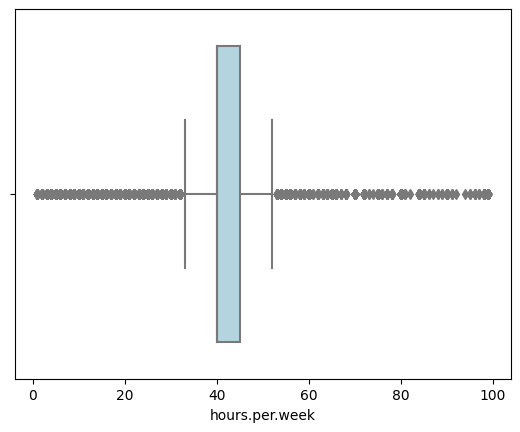

In [ ]:
  # Plotar os boxplot para análise de outliers
  for coluna in colunanumerica:
    sns.boxplot(x = dataset[coluna], color='lightblue')
    plt.show()


Com as análises descritivas das colunas numéricas se destacaram os seguintes pontos de alerta:

*  a presença de valores zerados nas colunas capital.gain e capital.loss.
*  a presença de outliers.

In [ ]:
dataset.groupby(['workclass'])['workclass'].count()

workclass
?                    1836
Federal-gov           960
Local-gov            2093
Never-worked            7
Private             22696
Self-emp-inc         1116
Self-emp-not-inc     2541
State-gov            1298
Without-pay            14
Name: workclass, dtype: int64

##**4 - Análise Exploratória Detalhada**

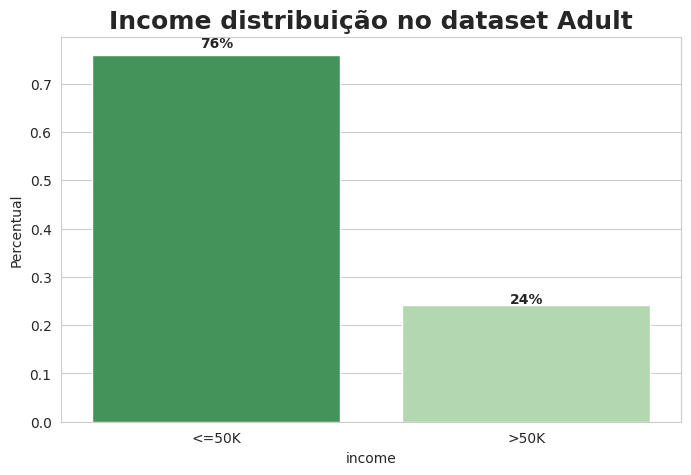

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize = (8,5))
plt.title('Income distribuição no dataset Adult', fontsize=18, fontweight='bold')
eda_percentage = dataset['income'].value_counts(normalize = True).rename_axis('income').reset_index(name = 'Percentual')

ax = sns.barplot(x = 'income', y = 'Percentual', data = eda_percentage.head(10), palette='Greens_r')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

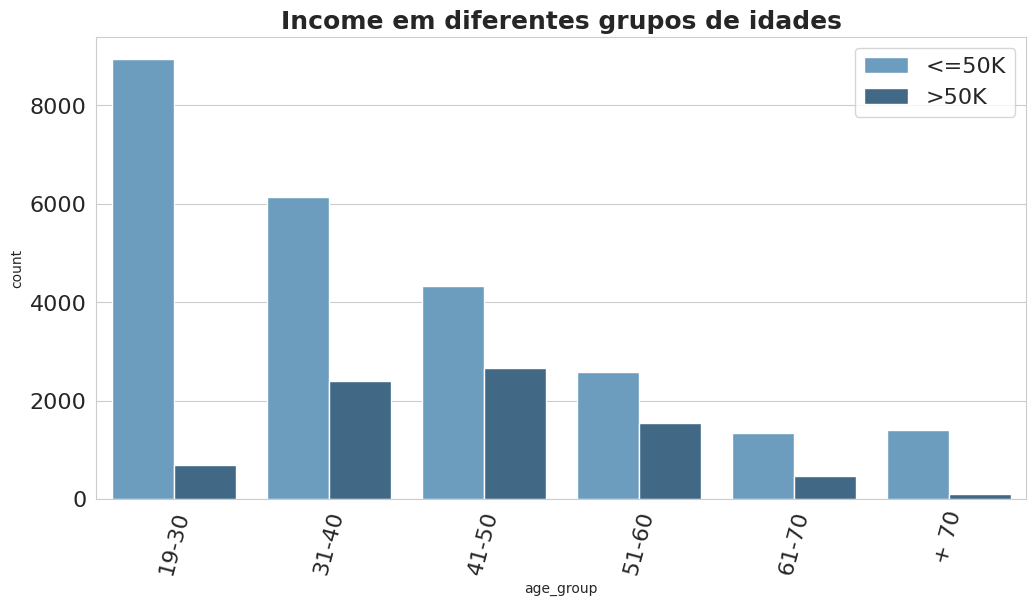

In [ ]:
def age_group(x):
    x = int(x)
    x = abs(x)
    if( 18 < x < 31 ):
        return "19-30"
    if( 30 < x < 41 ):
        return "31-40"
    if( 40 < x < 51 ):
        return "41-50"
    if( 50 < x < 61 ):
        return "51-60"
    if( 60 < x < 71 ):
        return "61-70"
    else:
        return "+ 70"

dataset['age_group'] = dataset['age'].apply(age_group)

plt.figure(figsize=(12,6))
order_list = ['19-30', '31-40', '41-50', '51-60', '61-70', '+ 70']
sns.countplot(x = dataset['age_group'], hue = dataset['income'], palette='Blues_d', order = order_list)
plt.title('Income em diferentes grupos de idades', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.xticks(rotation = 75)
plt.show()

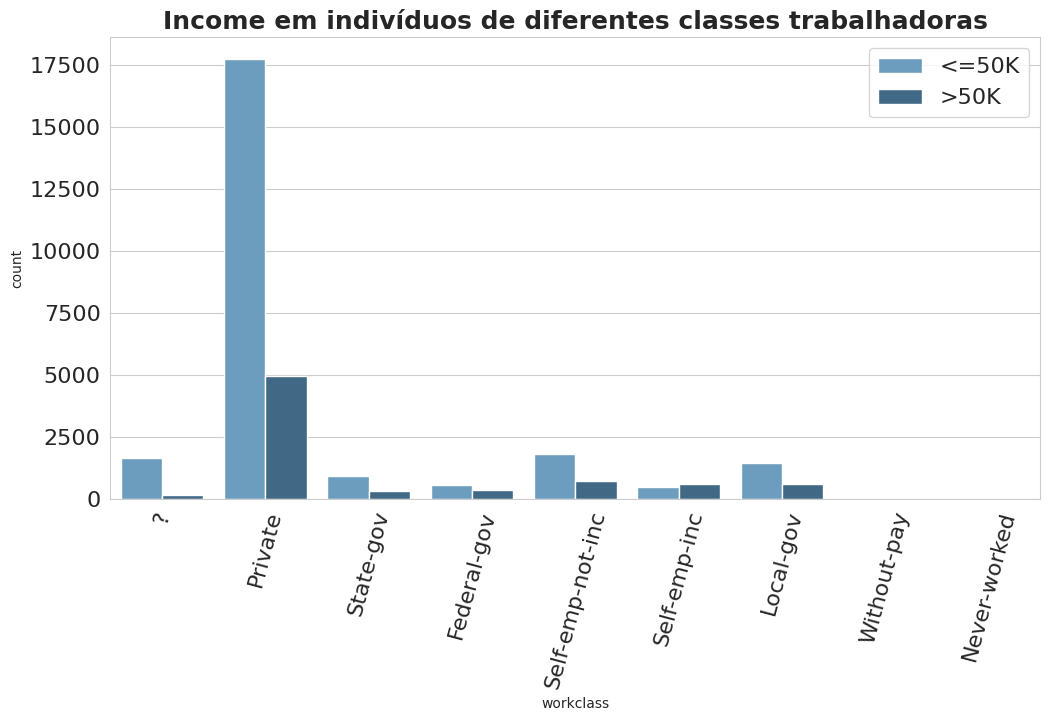

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x = dataset['workclass'], hue = dataset['income'], palette='Blues_d')
plt.title('Income em indivíduos de diferentes classes trabalhadoras', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.xticks(rotation = 75)
plt.show()

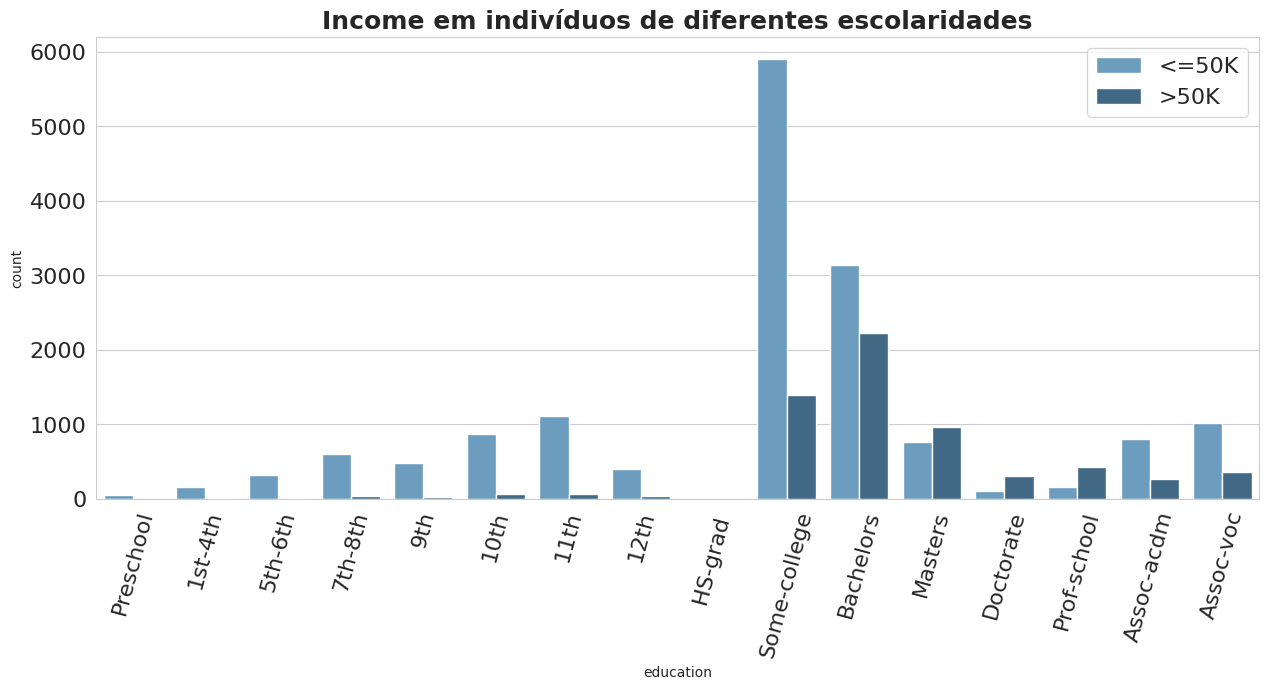

In [ ]:
plt.figure(figsize=(15,6))
order_list = ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th',
                'HS-grad ', 'Some-college', 'Bachelors', 'Masters', 'Doctorate', 'Prof-school',
              'Assoc-acdm', 'Assoc-voc']
sns.countplot(x = dataset['education'], hue = dataset['income'], palette='Blues_d', order= order_list)
plt.title('Income em indivíduos de diferentes escolaridades', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.xticks(rotation = 75)
plt.show()

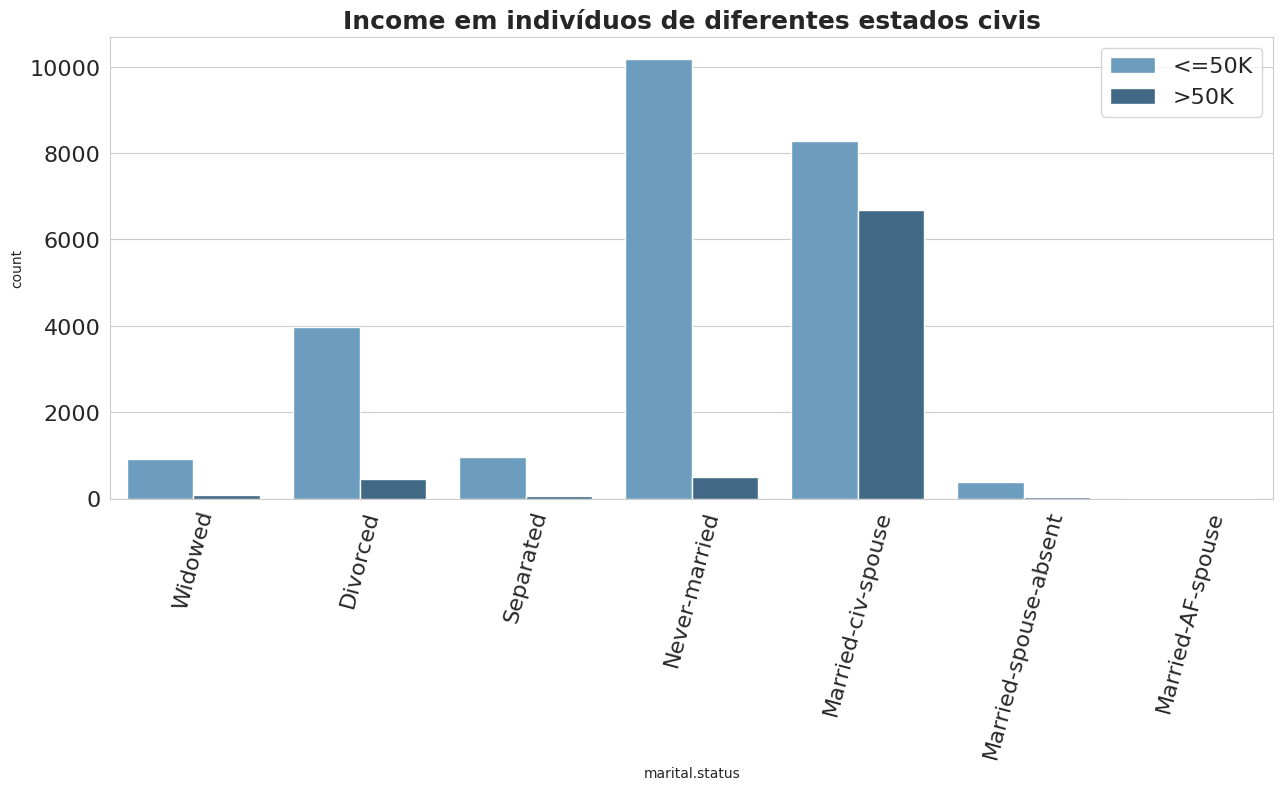

In [ ]:
plt.figure(figsize=(15,6))

sns.countplot(x = dataset['marital.status'], hue = dataset['income'], palette='Blues_d')
plt.title('Income em indivíduos de diferentes estados civis', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.xticks(rotation = 75)
plt.show()

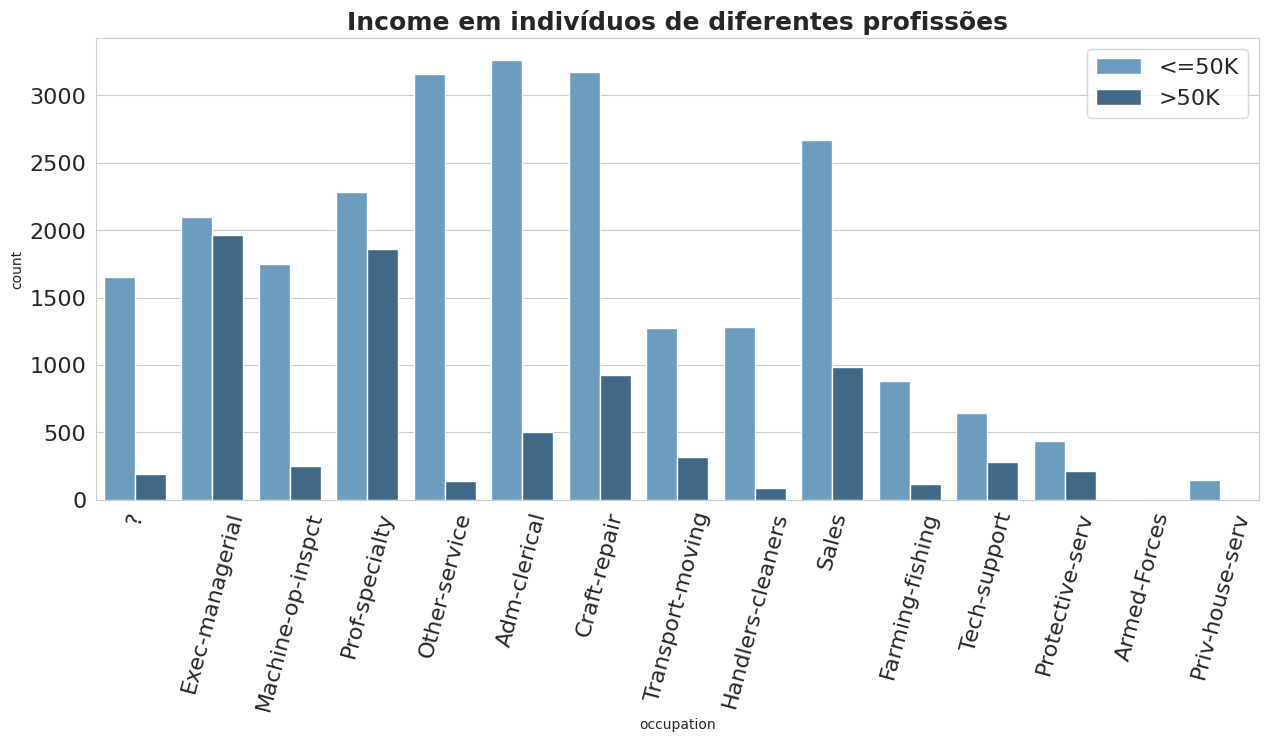

In [ ]:
plt.figure(figsize=(15,6))

sns.countplot(x = dataset['occupation'], hue = dataset['income'], palette='Blues_d')
plt.title('Income em indivíduos de diferentes profissões', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.xticks(rotation = 75)
plt.show()

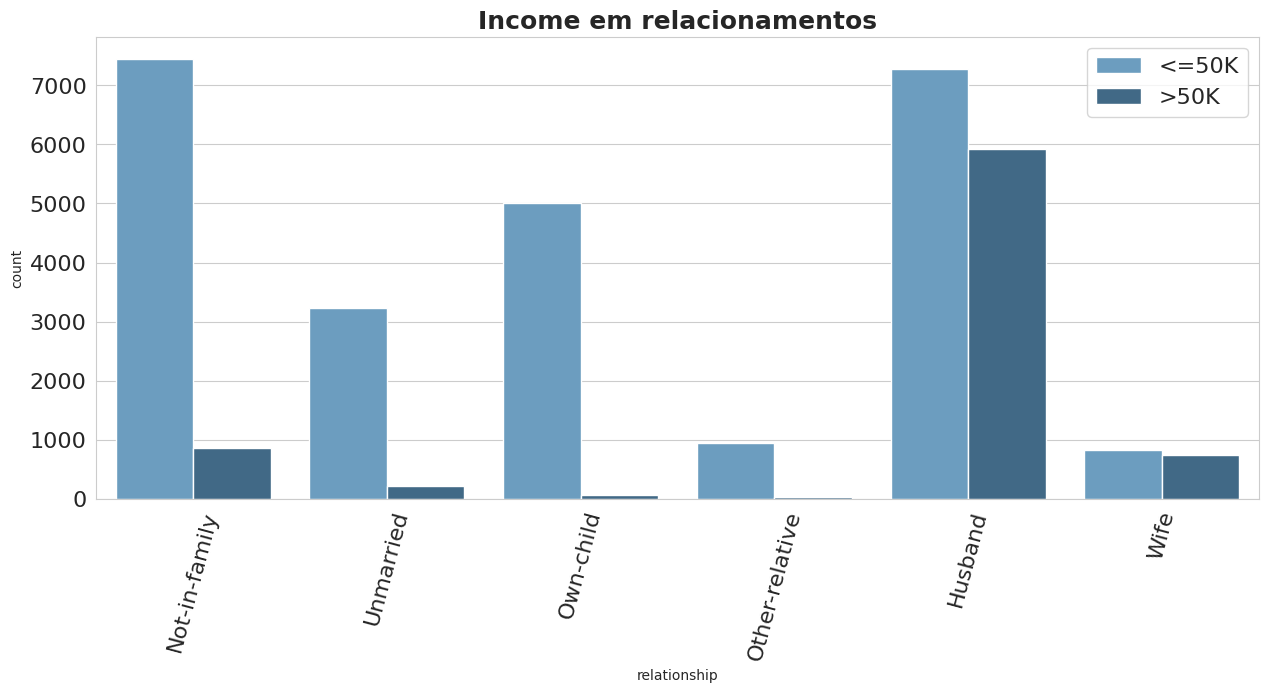

In [ ]:
plt.figure(figsize=(15,6))

sns.countplot(x = dataset['relationship'], hue = dataset['income'], palette='Blues_d')
plt.title('Income em relacionamentos', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.xticks(rotation = 75)
plt.show()

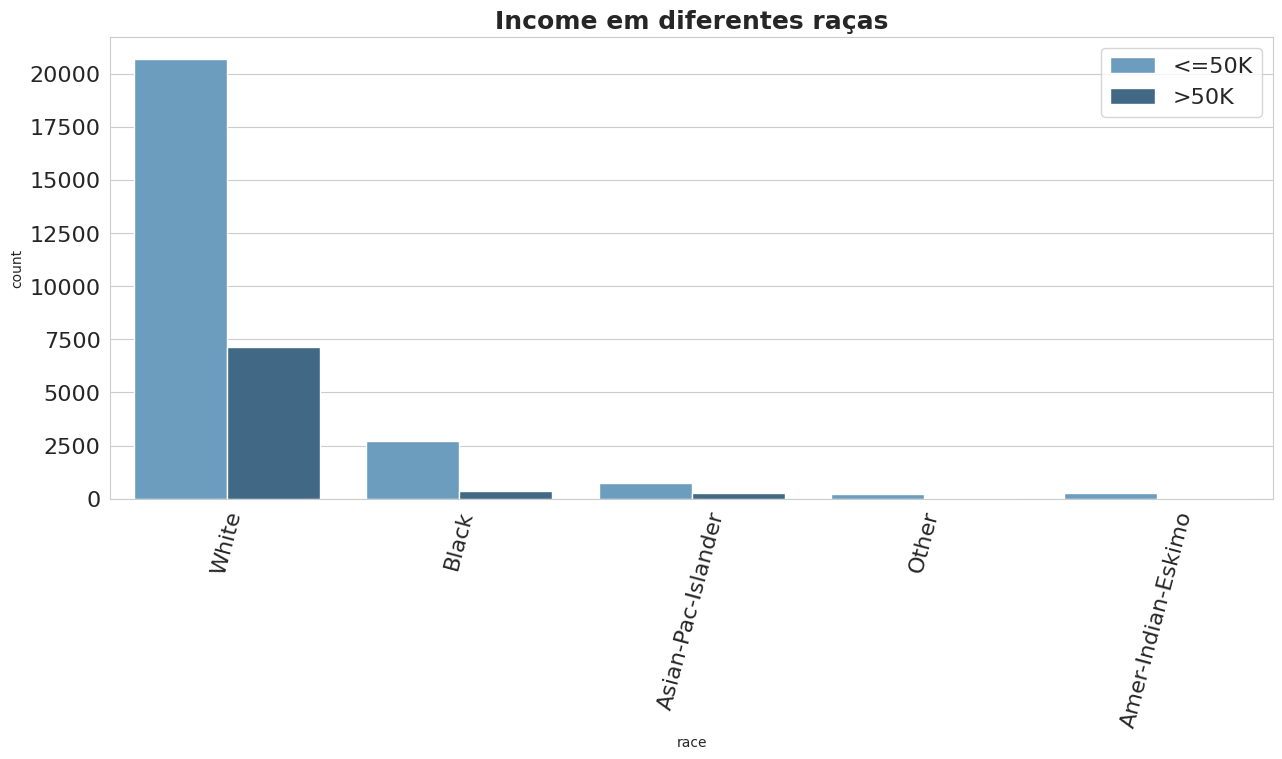

In [ ]:
plt.figure(figsize=(15,6))

sns.countplot(x = dataset['race'], hue = dataset['income'], palette='Blues_d')
plt.title('Income em diferentes raças', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.xticks(rotation = 75)
plt.show()

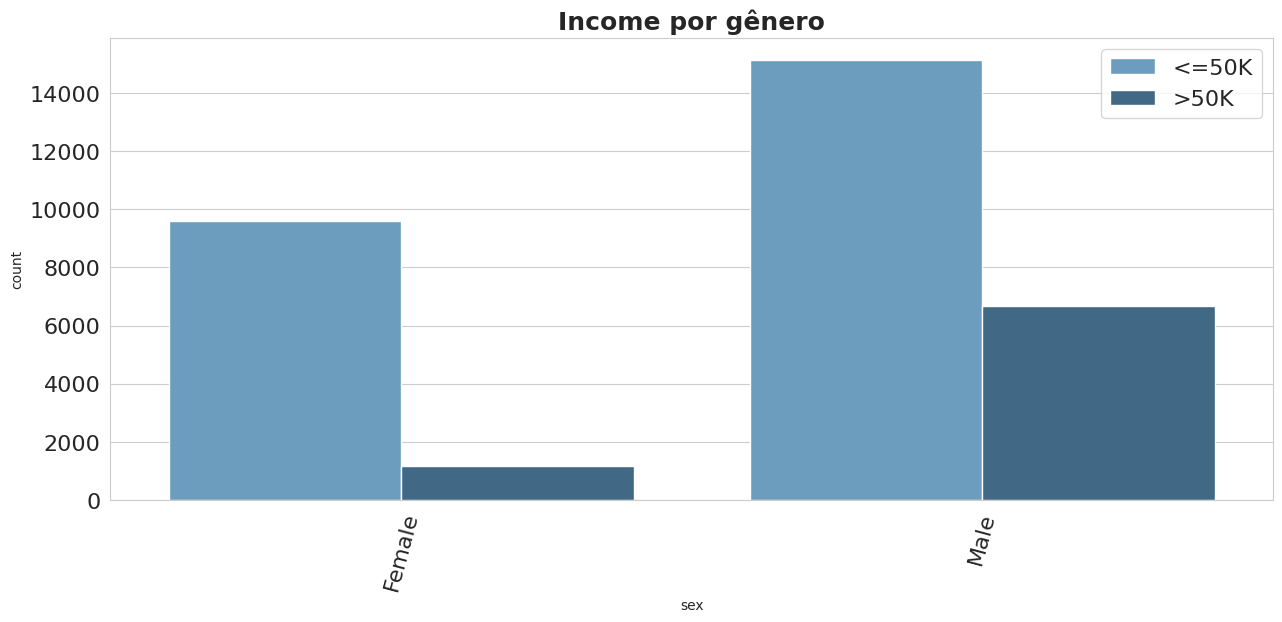

In [ ]:
plt.figure(figsize=(15,6))

sns.countplot(x = dataset['sex'], hue = dataset['income'], palette='Blues_d')
plt.title('Income por gênero', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.xticks(rotation = 75)
plt.show()

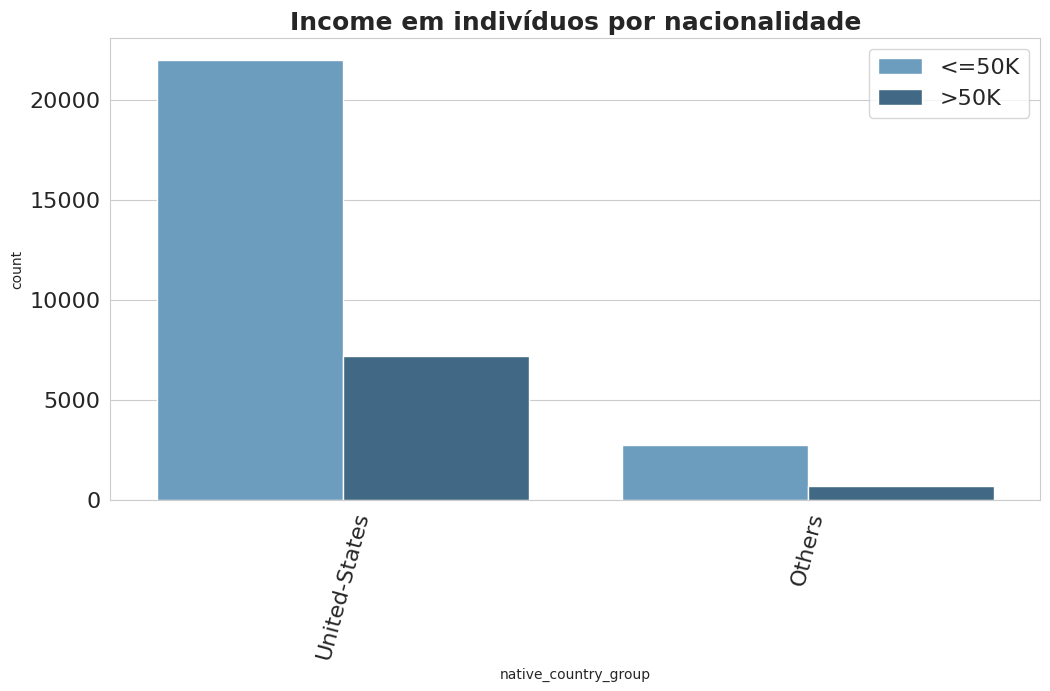

In [ ]:
def native_country_group(x):
    x = str(x)

    if( x == "United-States" ):
        return "United-States"
    else:
        return "Others"

dataset['native_country_group'] = dataset['native.country'].apply(native_country_group)
order_list = ['United-States','Others']
plt.figure(figsize=(12,6))
sns.countplot(x = dataset['native_country_group'], hue = dataset['income'], palette='Blues_d', order = order_list)
plt.title('Income em indivíduos por nacionalidade', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.xticks(rotation = 75)
plt.show()

<ipython-input-34-e83bb01f497c>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(), cmap = 'Greens_r', annot = True)


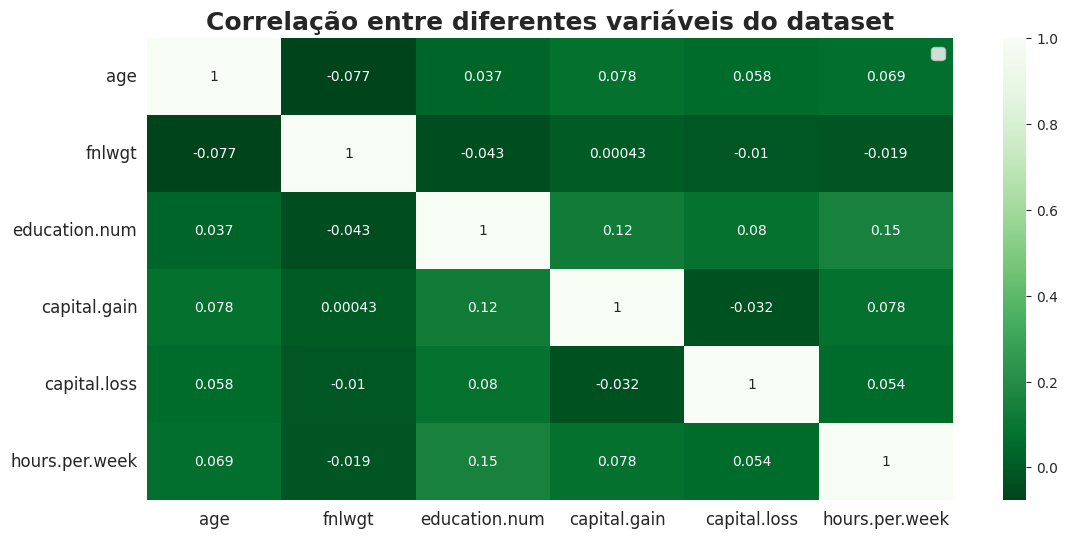

In [ ]:
# Correlação entre diferentes variáveis numéricas do dataset
plt.figure(figsize = (13,6))
plt.title("Correlação entre diferentes variáveis do dataset", fontsize = 18, fontweight = 'bold')
sns.heatmap(dataset.corr(), cmap = 'Greens_r', annot = True)
plt.xticks(fontsize=12, rotation = 0)
plt.yticks(fontsize=12, rotation = 0)
plt.legend(fontsize=12)

In [ ]:
dataset.dtypes

age                      int64
workclass               object
fnlwgt                   int64
education               object
education.num            int64
marital.status          object
occupation              object
relationship            object
race                    object
sex                     object
capital.gain             int64
capital.loss             int64
hours.per.week           int64
native.country          object
income                  object
age_group               object
native_country_group    object
dtype: object

## **5 - Pré-processamento dos dados**

1.   Retirar os missings.
2.   Tratar duplicidades.
3.   Tirar as colunas capital.gain, capital.loss, education.num, fnlwgt e native.country.
4.   Agrupar valores nos atributos education e marital.status.
5.   Tratar os outliers.







In [ ]:
dftratado = dataset.assign()
# Substituir os preechimentos feitos com '?' por null.
dftratado['workclass'] = dftratado['workclass'].replace('?', np.nan)
dftratado['occupation'] = dftratado['occupation'].replace('?', np.nan)
dftratado['native.country'] = dftratado['native.country'].replace('?', np.nan)
# Agrupar as workclass semelhantes
dftratado['workclass'] = dftratado['workclass'].replace(['Federal-gov', 'Local-gov', 'State-gov'], 'Government')
dftratado['workclass'] = dftratado['workclass'].replace(['Self-emp-inc', 'Self-emp-not-inc'],'Self_Employment')

In [ ]:
# Quantidade de '?' ainda existentes
for column in dftratado:
    print(f"{column} = {dftratado[dftratado[column] == '?'].shape[0]}")

age = 0
workclass = 0
fnlwgt = 0
education = 0
education.num = 0
marital.status = 0
occupation = 0
relationship = 0
race = 0
sex = 0
capital.gain = 0
capital.loss = 0
hours.per.week = 0
native.country = 0
income = 0
age_group = 0
native_country_group = 0


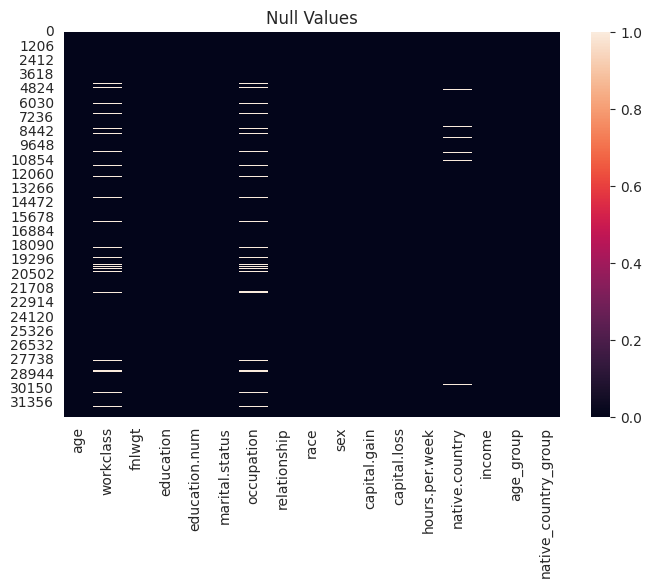

In [ ]:
# Verificar os missings
plt.figure(figsize=(8,5))
sns.heatmap(dftratado.isna())
plt.title('Null Values')
plt.show()

In [ ]:
# Percentual de missings em relação ao número total de dados preenchidos na coluna.
percent_missing = dftratado.isnull().sum() * 100 / len(dftratado)
percent_missing

age                     0.000000
workclass               5.638647
fnlwgt                  0.000000
education               0.000000
education.num           0.000000
marital.status          0.000000
occupation              5.660146
relationship            0.000000
race                    0.000000
sex                     0.000000
capital.gain            0.000000
capital.loss            0.000000
hours.per.week          0.000000
native.country          1.790486
income                  0.000000
age_group               0.000000
native_country_group    0.000000
dtype: float64

In [ ]:
# Retirar as linhas com missings
dftratado.dropna(how='any', inplace=True)

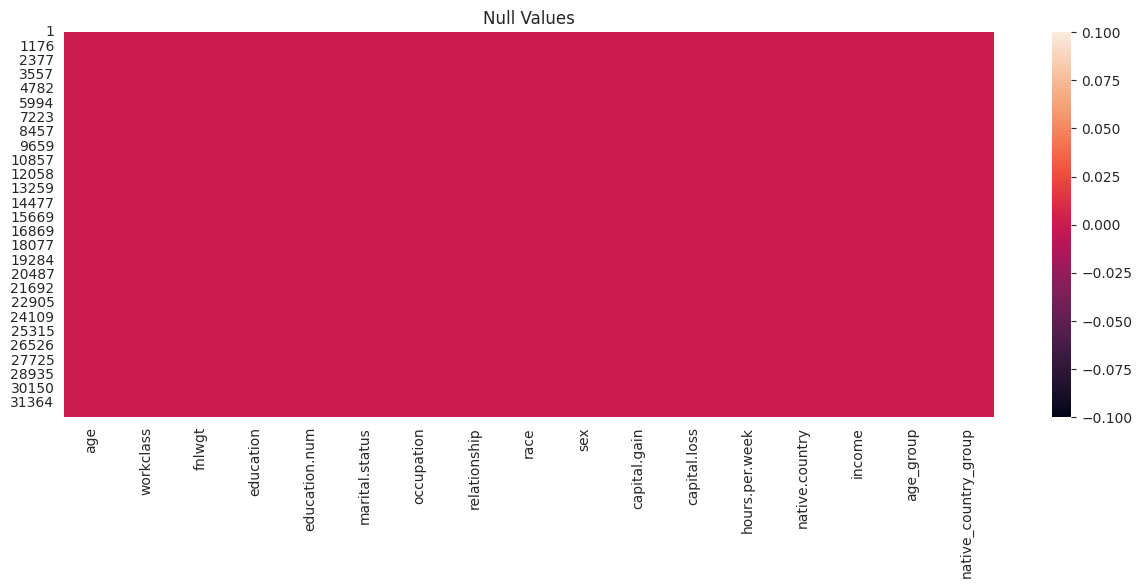

In [ ]:
# Verificar os missings
plt.figure(figsize=(15,5))
sns.heatmap(dftratado.isna())
plt.title('Null Values')
plt.show()

In [ ]:
# Analisar a quantidade de valores duplicados
print(f"Nós temos {dftratado.duplicated().sum()} valores duplicados")

Nós temos 24 valores duplicados


In [ ]:
# Retirar as duplicidades
dftratado = dftratado.drop_duplicates()

print(f"Depois de tratar os valores duplicados, ficamos com {dftratado.duplicated().sum()} duplicidades.")

Depois de tratar os valores duplicados, ficamos com 0 duplicidades.


In [ ]:
# Retirar coluna
dftratado = dftratado.drop(['capital.gain', 'capital.loss', 'fnlwgt', 'age_group','native.country'], axis=1)


In [ ]:
dftratado.groupby(['education','education.num'])['education.num'].count()

education     education.num
10th          6                 820
11th          7                1048
12th          8                 377
1st-4th       2                 149
5th-6th       3                 287
7th-8th       4                 556
9th           5                 455
Assoc-acdm    12               1008
Assoc-voc     11               1307
Bachelors     13               5042
Doctorate     16                375
HS-grad       9                9834
Masters       14               1626
Preschool     1                  44
Prof-school   15                542
Some-college  10               6668
Name: education.num, dtype: int64

In [ ]:
# Retirar coluna
dftratado = dftratado.drop(['education.num'], axis=1)

In [ ]:
# agrupamento do atributo "education"
agrupamento_education = {
  'Preschool': 'Dropout',
  '10th': 'Dropout',
  '11th': 'Dropout',
  '12th': 'Dropout',
  '1st-4th': 'Dropout',
  '5th-6th': 'Dropout',
  '7th-8th': 'Dropout',
  '9th': 'Dropout',
  'HS-Grad': 'HighGrad',
  'HS-grad': 'HighGrad',
  'Some-college': 'College',
  'Assoc-acdm': 'College',
  'Assoc-voc': 'College',
  'Bachelors': 'Bachelors',
  'Masters': 'Masters',
  'Prof-school': 'Masters',
  'Doctorate': 'Doctorate'
}

# agrupar valores do atributo "education"
dftratado['education_group'] = dftratado['education'].map(agrupamento_education).astype('category')
dftratado['education_group']

1        HighGrad
3         Dropout
4         College
5        HighGrad
6         Dropout
           ...   
32556     College
32557     College
32558    HighGrad
32559    HighGrad
32560    HighGrad
Name: education_group, Length: 30138, dtype: category
Categories (6, object): ['Bachelors', 'College', 'Doctorate', 'Dropout', 'HighGrad', 'Masters']

In [ ]:
# Retirar coluna
dftratado = dftratado.drop(['education'], axis=1)

In [ ]:
# agrupamento do atributo "marital-status"
agrupamento_marital_status = {
  'Never-married': 'NotMarried',
  'Married-AF-spouse': 'Married',
  'Married-civ-spouse': 'Married',
  'Married-spouse-absent': 'NotMarried',
  'Separated': 'Separated',
  'Divorced': 'Separated',
  'Widowed': 'Widowed'
}

# agrupar valores do atributo "marital-status"
dftratado['marital_status_group'] = dftratado['marital.status'].\
  map(agrupamento_marital_status).astype('category')
dftratado['marital_status_group']

1           Widowed
3         Separated
4         Separated
5         Separated
6         Separated
            ...    
32556    NotMarried
32557       Married
32558       Married
32559       Widowed
32560    NotMarried
Name: marital_status_group, Length: 30138, dtype: category
Categories (4, object): ['Married', 'NotMarried', 'Separated', 'Widowed']

In [ ]:
# Retirar coluna
dftratado = dftratado.drop(['marital.status'], axis=1)

In [ ]:
dftratado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30138 entries, 1 to 32560
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   age                   30138 non-null  int64   
 1   workclass             30138 non-null  object  
 2   occupation            30138 non-null  object  
 3   relationship          30138 non-null  object  
 4   race                  30138 non-null  object  
 5   sex                   30138 non-null  object  
 6   hours.per.week        30138 non-null  int64   
 7   income                30138 non-null  object  
 8   native_country_group  30138 non-null  object  
 9   education_group       30138 non-null  category
 10  marital_status_group  30138 non-null  category
dtypes: category(2), int64(2), object(7)
memory usage: 2.4+ MB


In [ ]:
dftratadocolscategoricas = [var for var in dftratado.columns if dftratado[var].dtype=='O']

for coluna in dftratadocolscategoricas:
  dftratado[coluna] = dftratado[coluna].astype('category')


In [ ]:
# Frequência de cada classe
dftratado['income'].value_counts()

<=50K    22632
>50K      7506
Name: income, dtype: int64

In [ ]:
dftratado.describe()

,age,hours.per.week
count,30138.000000,30138.000000
mean,38.442266,40.934734
std,13.131302,11.978951
min,17.000000,1.000000
25%,28.000000,40.000000
50%,37.000000,40.000000
75%,47.000000,45.000000
max,90.000000,99.000000


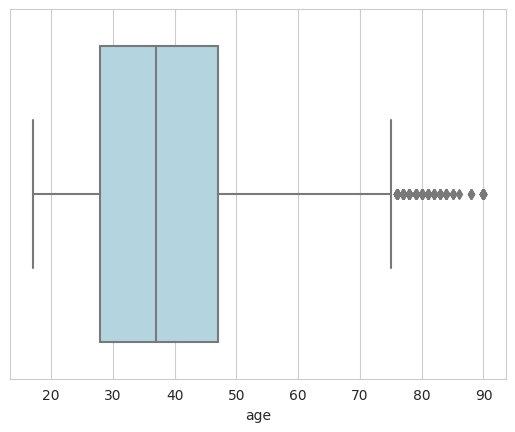

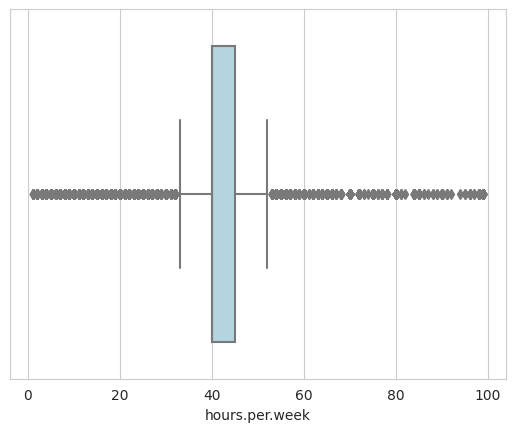

In [ ]:
# Plotar os boxplot para análise de outliers
dtcolunasnumericas = ['age', 'hours.per.week']
for coluna in dtcolunasnumericas:
  sns.boxplot(x = dftratado[coluna], color='lightblue')
  plt.show()

<Axes: >

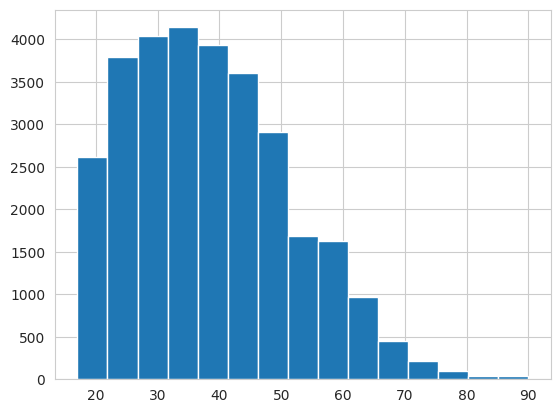

In [ ]:
dftratado['age'].hist(bins=15)

In [ ]:
print(f"Total de pessoas com a idade entre 17 To 50 : {len(dftratado[dftratado['age'].between(17,50)])}")

Total de pessoas com a idade entre 17 To 50 : 24447


In [ ]:
#for value in colname:
q1 = dftratado['age'].quantile(0.25) #primeiro quartil
q3 = dftratado['age'].quantile(0.75) #terceiro quartil
iqr = q3-q1 #intervalo interquartil
low  = q1-1.5*iqr #faixa aceitável
high = q3+1.5*iqr #faixa aceitável

In [ ]:
adult_df_include = dftratado.loc[(dftratado['age'] >= low) & \
                                (dftratado['age'] <= high)] #encontrando a faixa aceitável
adult_df_exclude = dftratado.loc[(dftratado['age'] < low) | \
                               (dftratado['age'] > high)] #faixa não aceitável


In [ ]:
print(adult_df_include.shape)

(29970, 11)


In [ ]:
print(adult_df_exclude.shape)

(168, 11)


In [ ]:
print(low)

-0.5


In [ ]:
age_mean=int(adult_df_include.age.mean()) #encontrar a média do intervalo aceitável
print(age_mean)

38


In [ ]:
# Imputar outlier com valor médio
adult_df_exclude.age=age_mean

<ipython-input-64-4883aba89150>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adult_df_exclude.age=age_mean


In [ ]:
dftratado=pd.concat([adult_df_include,adult_df_exclude]) # Concatenando no dataset dftratado
dftratado.shape

(30138, 11)

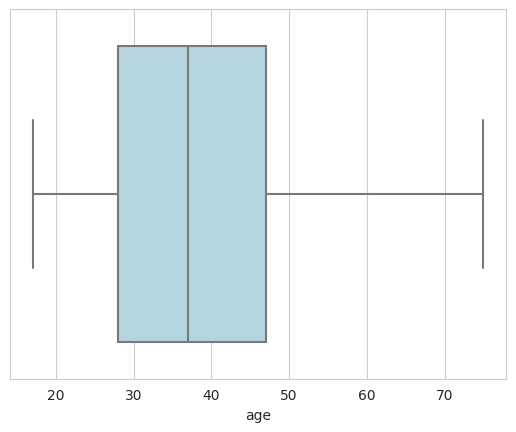

In [ ]:
# Plotar os boxplot para análise de outliers
dtcolunasnumericas = ['age']
for coluna in dtcolunasnumericas:
  sns.boxplot(x = dftratado[coluna], color='lightblue')
  plt.show()

<Axes: >

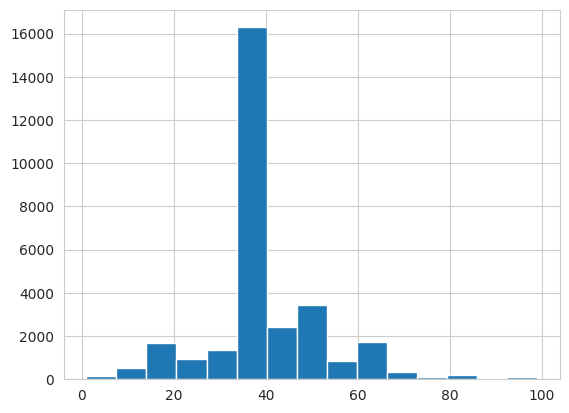

In [ ]:
dftratado['hours.per.week'].hist(bins=15)

##**6 - Separando em conjuntos de treino e teste**

In [ ]:
dftratado.head()

,age,workclass,occupation,relationship,race,sex,hours.per.week,income,native_country_group,education_group,marital_status_group
3,54,Private,Machine-op-inspct,Unmarried,White,Female,40,<=50K,United-States,Dropout,Separated
4,41,Private,Prof-specialty,Own-child,White,Female,40,<=50K,United-States,College,Separated
5,34,Private,Other-service,Unmarried,White,Female,45,<=50K,United-States,HighGrad,Separated
6,38,Private,Adm-clerical,Unmarried,White,Male,40,<=50K,United-States,Dropout,Separated
7,74,Government,Prof-specialty,Other-relative,White,Female,20,>50K,United-States,Doctorate,NotMarried


In [ ]:
dftratado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30138 entries, 3 to 32468
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   age                   30138 non-null  int64   
 1   workclass             30138 non-null  category
 2   occupation            30138 non-null  category
 3   relationship          30138 non-null  category
 4   race                  30138 non-null  category
 5   sex                   30138 non-null  category
 6   hours.per.week        30138 non-null  int64   
 7   income                30138 non-null  category
 8   native_country_group  30138 non-null  category
 9   education_group       30138 non-null  category
 10  marital_status_group  30138 non-null  category
dtypes: category(9), int64(2)
memory usage: 973.3 KB


In [ ]:
# Normalização
scaler = MinMaxScaler()
features_para_normalizar = ['age', 'hours.per.week']
dfnormalizado = dftratado[features_para_normalizar].values
normalizacao = scaler.fit_transform(dfnormalizado)
dfalteradocomnormalizacao = dftratado.assign()
dfalteradocomnormalizacao['age'] = normalizacao[:,0]
dfalteradocomnormalizacao['hours.per.week'] = normalizacao[:,1]
# Codificação one-hot
encoder = ce.OneHotEncoder(cols=['workclass', 'education_group','marital_status_group', 'occupation', 'relationship',
                                 'race', 'sex', 'native_country_group'])
dfonehotencoder = encoder.fit_transform(dfalteradocomnormalizacao)

In [ ]:
test_size = 0.30 # tamanho do conjunto de teste
seed = 7 # semente aleatória

# Declarando feature vector e target
X = dftratado.drop(['income'], axis=1)
y = dftratado['income']

# Separação em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout com estratificação

# Parâmetros e partições da validação cruzada
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação

# Exibir quantidades resultantes da divisão
print("Tamanho do treino: %5d linhas (%.1f%%)" % (len(X_train), (1 - test_size) * 100))
print("Tamanho do teste:  %5d linhas (%.1f%%)" % (len(X_test), (test_size) * 100))
print("Tamanho total:     %5d linhas (%.1f%%)" % (len(X), 100))

Tamanho do treino: 21096 linhas (70.0%)
Tamanho do teste:   9042 linhas (30.0%)
Tamanho total:     30138 linhas (100.0%)


In [ ]:
# Normalização nas colunas numéricas e One-Hot nas categóricas no X_treino
scaler = MinMaxScaler()
features_para_normalizar = ['age', 'hours.per.week']
dfnormalizado = X_train[features_para_normalizar].values
normalizacao = scaler.fit_transform(dfnormalizado)
dfalteradocomnormalizacao = X_train.assign()
dfalteradocomnormalizacao['age'] = normalizacao[:,0]
dfalteradocomnormalizacao['hours.per.week'] = normalizacao[:,1]
# Codificação one-hot
encoder = ce.OneHotEncoder(cols=['workclass', 'education_group','marital_status_group', 'occupation', 'relationship',
                                 'race', 'sex', 'native_country_group'])
X_train = encoder.fit_transform(dfalteradocomnormalizacao)

In [ ]:
X_train

,age,workclass_1,workclass_2,workclass_3,workclass_4,occupation_1,occupation_2,occupation_3,occupation_4,occupation_5,...,education_group_1,education_group_2,education_group_3,education_group_4,education_group_5,education_group_6,marital_status_group_1,marital_status_group_2,marital_status_group_3,marital_status_group_4
13194,0.017241,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
20448,0.431034,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
6308,0.172414,1,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
30382,0.310345,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
14392,0.224138,0,1,0,0,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14675,0.413793,0,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
5530,0.258621,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
32137,0.396552,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
27320,0.120690,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0


In [ ]:
# Normalização nas colunas numéricas e One-Hot nas categóricas no X_test
scaler = MinMaxScaler()
features_para_normalizar = ['age', 'hours.per.week']
dfnormalizado = X_test[features_para_normalizar].values
normalizacao = scaler.fit_transform(dfnormalizado)
dfalteradocomnormalizacao = X_test.assign()
dfalteradocomnormalizacao['age'] = normalizacao[:,0]
dfalteradocomnormalizacao['hours.per.week'] = normalizacao[:,1]
# Codificação one-hot
encoder = ce.OneHotEncoder(cols=['workclass', 'education_group','marital_status_group', 'occupation', 'relationship',
                                 'race', 'sex', 'native_country_group'])
X_test = encoder.fit_transform(dfalteradocomnormalizacao)

In [ ]:
X_test

,age,workclass_1,workclass_2,workclass_3,workclass_4,occupation_1,occupation_2,occupation_3,occupation_4,occupation_5,...,education_group_1,education_group_2,education_group_3,education_group_4,education_group_5,education_group_6,marital_status_group_1,marital_status_group_2,marital_status_group_3,marital_status_group_4
25912,0.500000,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
7140,0.586207,0,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
15162,0.206897,0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
26122,0.103448,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
7167,0.293103,0,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7665,0.068966,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
18582,0.120690,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
6173,0.793103,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
20690,0.241379,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


<Axes: >

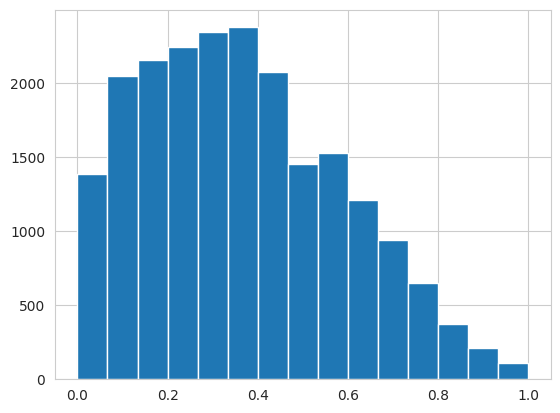

In [ ]:
X_train['age'].hist(bins=15)

<Axes: >

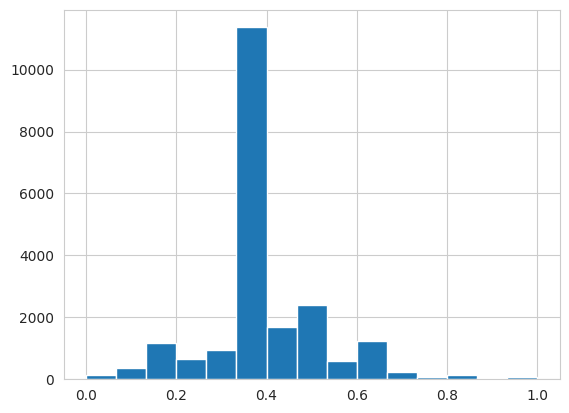

In [ ]:
X_train['hours.per.week'].hist(bins=15)

In [ ]:
# Checando os valores ausentes em X_train
X_train.isnull().sum()

age                       0
workclass_1               0
workclass_2               0
workclass_3               0
workclass_4               0
occupation_1              0
occupation_2              0
occupation_3              0
occupation_4              0
occupation_5              0
occupation_6              0
occupation_7              0
occupation_8              0
occupation_9              0
occupation_10             0
occupation_11             0
occupation_12             0
occupation_13             0
occupation_14             0
relationship_1            0
relationship_2            0
relationship_3            0
relationship_4            0
relationship_5            0
relationship_6            0
race_1                    0
race_2                    0
race_3                    0
race_4                    0
race_5                    0
sex_1                     0
sex_2                     0
hours.per.week            0
native_country_group_1    0
native_country_group_2    0
education_group_1   

In [ ]:
# Checando os valores ausentes em X_teste
X_test.isnull().sum()

age                       0
workclass_1               0
workclass_2               0
workclass_3               0
workclass_4               0
occupation_1              0
occupation_2              0
occupation_3              0
occupation_4              0
occupation_5              0
occupation_6              0
occupation_7              0
occupation_8              0
occupation_9              0
occupation_10             0
occupation_11             0
occupation_12             0
occupation_13             0
occupation_14             0
relationship_1            0
relationship_2            0
relationship_3            0
relationship_4            0
relationship_5            0
relationship_6            0
race_1                    0
race_2                    0
race_3                    0
race_4                    0
race_5                    0
sex_1                     0
sex_2                     0
hours.per.week            0
native_country_group_1    0
native_country_group_2    0
education_group_1   

In [ ]:
X_train.shape

(21096, 45)

In [ ]:
X_test.shape

(9042, 45)

Nós vimos que inicialmente tínhamos 10 colunas, não considerando a coluna das classes, agora temos 45.

In [ ]:
X_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,occupation_1,occupation_2,occupation_3,occupation_4,occupation_5,...,education_group_1,education_group_2,education_group_3,education_group_4,education_group_5,education_group_6,marital_status_group_1,marital_status_group_2,marital_status_group_3,marital_status_group_4
13194,0.017241,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
20448,0.431034,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
6308,0.172414,1,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
30382,0.310345,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
14392,0.224138,0,1,0,0,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0


In [ ]:
X_test.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,occupation_1,occupation_2,occupation_3,occupation_4,occupation_5,...,education_group_1,education_group_2,education_group_3,education_group_4,education_group_5,education_group_6,marital_status_group_1,marital_status_group_2,marital_status_group_3,marital_status_group_4
25912,0.500000,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
7140,0.586207,0,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
15162,0.206897,0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
26122,0.103448,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
7167,0.293103,0,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0


Converter a coluna target Income para 0 e 1.

In [ ]:
y_train_lb = y_train.replace(to_replace=['<=50K', '>50K'], value=[0, 1])
y_test_lb = y_test.replace(to_replace=['<=50K', '>50K'], value=[0, 1])

In [ ]:
X_train.describe()

,age,workclass_1,workclass_2,workclass_3,workclass_4,occupation_1,occupation_2,occupation_3,occupation_4,occupation_5,...,education_group_1,education_group_2,education_group_3,education_group_4,education_group_5,education_group_6,marital_status_group_1,marital_status_group_2,marital_status_group_3,marital_status_group_4
count,21096.000000,21096.000000,21096.000000,21096.000000,21096.000000,21096.000000,21096.000000,21096.000000,21096.000000,21096.000000,...,21096.000000,21096.000000,21096.000000,21096.000000,21096.000000,21096.000000,21096.000000,21096.000000,21096.000000,21096.000000
mean,0.365708,0.739050,0.142112,0.118411,0.000427,0.123957,0.132253,0.105044,0.121587,0.021663,...,0.325370,0.299962,0.122962,0.072715,0.166761,0.012230,0.333807,0.465776,0.172687,0.027730
std,0.219750,0.439163,0.349174,0.323102,0.020651,0.329540,0.338773,0.306617,0.326816,0.145584,...,0.468524,0.458252,0.328401,0.259675,0.372772,0.109913,0.471583,0.498839,0.377985,0.164203
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.189655,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.344828,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.517241,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##**7 - Conclusão**

> **7.1 Resumo**

Alguns pontos importantes para destacar:

*  Dentro da faixa etária de 41 a 60 anos há uma maior participação de salários
acima de 50k.

* “Self-emp-inc” é a única Working Classes onde o número de pessoas que ganham mais de 50k supera aqueles que ganham menos. Já na "Private", mais de 75% dos indivíduos ganham menos de 50k ao ano.

* Da Preschool até o 12º ano de escolaridade poucas pessoas ganham mais de 50k. Já as escolaridades “Bachelors”, “Masters”, “Doctorate” e “Prof-school” há uma concentração maior de pessoas que ganham mais de 50 mil dólares por ano em relação ao que ganham menos desse valor.

* "Married-civ-spouse" é o estado civil com a maior concentração de indivíduos ganhando mais de 50k ao ano.

* "Exec-managerial" e "Prof-specialty" possuem o maior número de indivíduos ganhando mais de 50k por ano.

* Homens tendem a ter uma probabilidade maior em ganhar mais 50k por ano do que as mulheres.

* United-States concentra a maior quantidade de amostras de indivíduos nas classes maior ou menor de 50K.

* Analisando o dataset foi verificado que os missings estavam preenchidos como "?" ao invés de estarem como nulos, por este motivo foi necessário o tratamento dos dados substituindo os valores como "?" para null, sendo feita em seguida a retirada dos missings, já que o percentual de participação destes valores em toda base era baixo.

* As colunas “capital.again” e “capital.loss” tinham muitos valores preenchidos como 0, o que me fez tomar a decisão de retirar estas colunas.

* Ao analisar a correlação da coluna "fnlwgt" com as demais, verifiquei que não teria impacto se fosse retirada da base, já que apresentou uma correlação insignificante.

* As colunas “education” e “education.num” eram redundantes, optei por retirar a “education.num” (numérica) e deixar a “education” (categórica).

* Agrupei os valores na coluna “education” e na “marital.status”, reduzindo o dataset para deixá-lo um pouco mais performático.

* Os outliers da coluna “age” foram tratados, sendo substituídos pela média dos valores entre os “low” (q1-1.5*iqr) e “hight” (q3+1.5*iqr).

* As colunas categóricas nominais foram tratadas usando o OneHotEncoder, pois a ordenação dos valores não era importante.

* As colunas numéricas “age” e “hour.per.week” foram normalizadas usando o MinMaxScaler.


> 7.2 **Entendimento final**

O que ficou claro em meu entendimento analisando o dataset Adult, mesmo aparentando ser óbvio, mas que aos poucos tem mudado na sociedade, é que os homens brancos de nacionalidade americana, com um alto grau de escolaridade, casado, e com uma boa ocupação profissional, trabalhando uma média de 40 horas por semana, é o maior público com a possibilidade de receber mais de 50 mil dólares por ano.